# **Loan Default Prediction - Final Submission**


This section contains the 'Executive summary', 'Problem and solution summary' and 'Recommendations for implementation'. After this section I have included my entire milestone submission.

### **Executive Summary**

---



In the banking industry, loan defaults present a major risk, affecting profitability and financial stability of a bank. **This project attempted to develop a predictive model to identify potential loan defaulters more efficiently and accurately than the current manual process.**

The model was aimed at predicting as many loans that would default from all loans that defaults. This is measured using the metric recall. In this project **recall was tried to be improved while maintaining a reasonable balance with precision (so the loss of potential opportunities is not extreme in the attempt of improving recall).**

It was concluded from the project that the **Tuned Random Forest model is the best model** to be implemented for the bank to predict potential loan defaults. More details about the chosen final model solution, the reasoning behind the chosen solution and other key findings from this projects are discussed in below sub sections of this Executive summary.

####**Important findings from the analysis:**

Below are some key insights that were found during this project:

A **20% overall loan default rate was observed in the current customer data**. Therefore it is timely and vital that the current loan approval process is improved in accuracy and transparency.

The current average loan amount is 18608.

**Debt to Income Ratio (DEBTINC) is a very powerful metric that can be used in loan approval process.** It was observed in EDA also that all clients **(84 clients) with a DEBTINC above 45 have defaulted their loans.** After analysing the 3 tuned models, it can be confirmed that all three models identify DEBTINC as the most influenctial feature that impacts the loan defaulting. If a borrower has a high DEBTINC, it isuggests that a significant portion of their income is already allocated to debt payments. This leaves less room in their budget for additional loan payments allowing a high likeliness for that borrower to default on a new loan taken. Therefore DEBTINC can be used to decide on loan approvals.

**DELINQ (the Number of delinquent credit lines) is also a highly impactul feature that should be considered in loan approval process.** This feature is identified by both Decision tree and random forest as high impact feature on loan default. DELINQ indicates past difficulties in meeting credit obligations. A higher number of delinquent accounts suggests that the borrower has struggled to make payments on time, which is a strong sign of financial struggle on the borrower's end and therefore can lead to loan defaults.

**CLAGE** (Age of Credit Line) has a negative correlation with default risk.

All clients with DEROG (Number of major derogatory reports) above 6 have defaulted their loans. All clients with DELINQ (Number of delinquent credit lines) above 5 have defaulted their loans. All clients with NINQ (Number of recent credit inquiries) above 11 have defaulted their loans. However, in all above three cases, the count is comparatively low. Even though the count is low, it would be worth to investigate how those loans got approved at the first place with such high DEROGs, DELINQs and NINQs. Additionaly the applicants with such high DEROGs, DELINQs or NINQs can be considered high risk applicants and act accordingly.

**High DEBTINC and high DELINQ issues are most significant indicators of potential loan defaults**. All remaining features have compartively less impact on a loan's possibility of getting defaulted.

**Model Performance:** The tuned Random Forest model outperforms Logistic Regression and Decision Tree in terms of  recall, F1-score and accuracy. The tuned Random Forest was able to achieve 80% recall while maintaining a 61% F1 score and an 80% accuracy and therefore achieving a high recall while not costing a lot on precision.

####**Final proposed model specifications:**

**Model Chosen:** **Tuned Random Forest**

**Best Parameters:**

Criterion: 'gini'

Max Depth: 4

Max Features: 0.8

Min Samples Leaf: 1

Min Samples Split: 5

Number of Estimators: 150


**Reason for selection:**

In this project I tried out 3 different models; Logistic Regression, Decision Tree and Random Forest. Then i improved them to see which one of the model performs best.

The logistic regression was the lowest performing model in terms of all metrics and therefore it was omitted.

The main intension of the project was to improve recall. In that context the decision tree gives the highest recall of 92%. However decision tree gives that recall on the expense of a very low precision (33%) and an F1 score below 50%. This means the decision tree predicts 92% of loans that actually defaulted while labeling a lot of Non defaulters also as defaulting. Infact, from all the instances the model predicts to default only 33% turns out to be actual defaults and remaining 67% are actually non defaults. It is therefore not reasonable enough to chose Decision Tree due to the cost of massive count of lost opportunities it causes.

The Random Forest on the other hand has a recall of 80% meaning it can predict 80% of loans that actually defaulted while maintaining a reasonable balance with precision (49%) with an F1 score of 61%. Therefore when the 3 models are considered, Random Forest outperformed the other two models in predicting defaulting loans while minimizing false positives and thereby not causing a lot of lost opportunities.

The reasoning is further explained in the 'Problem and Solution Summary' section.

####**key next steps:**


1. The Random Forest Model can be deployed into production and incorporated into the current loan approval process. SHAP and PDP can be used for interpretability and transparency of the model.

2. Consider **conducting Further Analysis** to improve/refine the model and explore additional features.

3. **Continuosly monitor the performance** of the model and update as required based on new data and new features to ensure it's accuracy.

4. Consider collecting more features such as **Loan Term, Applicant's Income, Applicant's age and Previous Defaults** which can improve analysis as well as the predictive model.

5. Consider **educating the borrowers** on how they can improve their creditworthiness early on.

6. Consider **setting up a maximum DEBTINC a borrower should not have exceeded** in order to be eligible for a loan. Note that currently, all clients with a DEBTINC above 45 have defaulted their loans. **There have been 84 clients with DEBTINC over 45 and all 84 of them have defaulted their loans.**

7. In addition to setting a maximum DEBTINC for eligibility for a loan, bank can also indestigate how those 84 loans got approved with such a high DEBTINC and take necessary steps to prevent/control loans being given out for clients with such extreme DEBTINCs.

8. **Be  cautious about the borrower's DELINQ and DEROG** as well.  (Note that currently, all clients with a DEROG above 6 and all clients with DELINQ above 5 have defaulted their loans).









### **Problem and solution summary**

---



This section includes 4 subsections which will summarise the problem this project aimed at solving, provide final model specifications including the reasoning behind chosing the said model and decribe how the solution will affect the business.

#### **Summary of the problem**

Loans make up a considerable portion of a bank's business operations. Loan defaults are a significant risk for a bank, as the loans form a major part of their revenue through interest payments. Loan Defaults causes substantial financial losses, and adversely affect the bank's profitability, lending capacity and financial stability.

Whenever a client applies for a loan, they go through an approval process where the banks look at several factors of the loan applier before decising if that person is suitable for a loan. However this manual process for loan approval is less efficient, and it can be prone to human errors as well as personal biases.

Therefore, a more efficient and reliable system needs to be created to predict the customers that are likely to default on their loans. It helps in reducing financial losses that can be caused by potential loan defaults, it improves efficiency and accuracy with miinimum human error or bias in the loan approval process.

When implementing a model that predicts loan defaults, depending on the accuracy of the model there can be cases of False positives (loans that actually do not default, yet the model predicts to default) and False Negatives (loans that actually default, yet the model predicts not to default). There are costs associated with each of those false predictions and therefore there is a tradeoff in trying to minimize one of these groups.

In case of **False positives**, the bank loses an opportunity to give a loan to potential customer thereby losing the interest income from that customer. In addition to that, that customer whose loan did not get approved may lose their trust and interest in the bank as well therefore creating a possible loss of any future opportunities with that customer.

In case of a **False negatives**, the bank loses almost entire principal amount given away to that customer as they default their loan. When considering the costs, although both cases are losses, it is clear that a false negative is a higher cost to the bank than a false positive.

Therefore this project was aimed at minimizing false negatives, ie maximising True positives. The metric invloved with True positive rate is recall. So this project aimed at maximizing recall while attempting to achieve a reasonable balance between recall and precision because a False Positive is also a cost to bank in terms of a Lost Opportunity and therefore a lost customer.


#### **Final Solution Design Background**


In a model that predicts whether a loan will default or not, it is important to understand that when the **model tries to increase the recall** (from all loans that actually default, the percentage the model predicts to default), there is a risk of increasing false positives (loans that actually do not default, yet the model predicts to default). These **false positives are a loss of opportunities** for the bank where the bank will lose the potential interest income from those potential clients and also there is a possibility that the bank will lose any future prospective opportunties with that customer as well.

Therefore when building the model and selecting the best model, it should be taken into consideration what percentage of loans that actually default (true positives) can the model correctly predict as defaulting, while not massively increasing the false positives (the percentage of loans that actually do not default yet, are predicted by the model as defaults).

I split the dataset into training and test set before modeling.

In this project I have tried out 3 classification models:
1. Logistic Regression
2. Decision Tree
3. Rabdom Forest

After building three intial models I have attempted to improve them:
1. Logistic Regression - By recognizing and using Optimal Threshold
2. Decision Tree - By tuning hyper parameters
3. Rabdom Forest - By tuning hyper parameters

Then I compared and evaluated the three improved models to figire out which model has the best Recall pared with a reasonable F1 score (F1 score is the harmonic mean of precision and recall). The Random Forest model performed the best in terms of Recall, F1 score and accuracy, making it the most effective choice for predicting defaults. Given below are the metrics evaluated between 3 models:

#####**Model Comparison and Evaluation**

**1. Logistic Regression**

***Recall: 62%***

Recall reflects the ability of the model to identify all relevant instances of Defaults (true positives) from all actual instances of Defaults (true positives + false negatives). A recall of 62% indicates that the Logistic Regression model only correctly identifies 62% of all actual Loan default instances in the test data but misses a notable portion of them.

***Precision: 35%***

Precision is the proportion of true positives among all instances classified as Defaults (true positives + false positives). A precision of 35% means that only 35% of the instances predicted as Defaults are actually Defaults. 65% that are predicted by the model as defaults are actually non defaults. This is a massive loss of opportunities.

***F1 Score: 45%***

The F1 Score is the harmonic mean of precision and recall, providing a single metric that balances both recall and precision.This moderate F1 Score of 45% indicates a trade-off between recall and precision, with neither being very high. The model performs reasonably but has substantial room for improvement.

***Accuracy: 70%***

Accuracy reflects the overall correctness of the model, that is the proportion of true positives and true negatives out of all predictions. An accuracy of 70% means the model correctly classifies 70% of the instances in the test set.

**2. Decision Tree**

***Recall: 92%***

With a recall of 92%, the Decision Tree model successfully identifies 92% of all actual Defaults. This suggests that the model is very effective at capturing Defaults. This can also indicate that the model might not be performing well in other areas.

***Precision: 33%***

 A precision of 33% means that only 33% of the instances predicted as Defaults are actually Defaults. This indicates a vety high number of false positives relative to true positives. (77% of instances classified as Defaults are actually Not defaults). This is not a reasonable precision for a model even when the target is to improve recall. Because the model seem to achive the 92% recall at the expense of a massive loss in precision.

***F1 Score: 48%***

The F1 Score of 48% balances recall and precision. This score suggests that the Decision Tree model suffers from a trade-off where high recall comes at the cost of very low precision.

***Accuracy: 61%***

The overall accuracy of 61% means that the model correctly classifies 61% of all instances. This is lower than Logistic Regression and Random Forest. The lower accuracy combined with high recall and low precision indicates the model might be too biased towards identifying defaults but not performing well overall.

**3. Random Forest**

***Recall: 80%***

A recall of 80% indicates that the Random Forest model correctly identifies 80% of all actual Default loans. This is an improvement over Logistic Regression. Although this is somewhat less than the Decision Tree, the model performs well in identifying loan defaults.

***Precision: 49%***

With a precision of 49%, about half of the instances predicted as Defaults are indeed Defaults. This represents a significant improvement over both the other models. This model, while achieving a high recall of 80%, balances recall with better precision, reducing the number of false positives compared to Logistic Regression and Decision Tree.

***F1 Score: 61%***

The F1 Score of 61% reflects a good balance between recall and precision, suggesting that the Random Forest model performs well overall in identifying Default loans with fewer trade-offs and a well rounded performance.

***Accuracy: 80%***

An accuracy of 80% means the Random Forest model correctly classifies 80% of all instances. This is the highest accuracy among the models. The model is effective overall, likely due to its ability to handle class imbalance better and provide robust predictions across both classes.

**Summary**

**Logistic Regression:** Provides a balanced view but with moderate recall and precision, indicating room for improvement in identifying Default instances.

**Decision Tree:** Shows high recall but poor precision, leading to a low F1 Score. This model is highly sensitive to Defaults but may overfit or have many false positives.

**Random Forest:** Offers the best overall performance with high recall, good precision, and the highest accuracy. It provides a good balance between identifying defaults while minimizing false positives.

Overall, the Random Forest model seems to be the best choice based on the metrics, offering a strong balance between recall, precision, and accuracy.

#### **Final Model Specifications and Reason for the proposed solution design**

**Final Model Specifications:**

**Tuned Random Forest with below mentioned best parameters:**

Criterion: 'gini'

Max Depth: 4

Max Features: 0.8

Min Samples Leaf: 1

Min Samples Split: 5

Number of Estimators: 150

The Tuned Radnom Forest was chosen as the best model to predict defaults. Below are the reasons why Random Forest was chosen.


*   Logistic Regression has the lowest performace with regards to all metrics
*   From decision tree and random forest, even though decision tree had 92% Recall, it's F1 score was 49% and precision was only 33% which is not a reasonable tradeoff between recall and precision. The decision tree was achieving the 92% recall by indicating a lot of loans as defaults creating a higher number of false positives and thereby causing a massive loss of opportunities. In other words, When the model predicts a set of loans as defaults, 67% of them are actually non defaults. This accounts to a significant amount of lost opportunities. Therefore the decision tree model is not justifiable to be used in production environment.
*   Random Forest on the other hand offers a decent recall of 80%, along with  the best trade-off between recall and precision among the three models, and its robustness to outliers is crucial given the presence of outliers in the data. Furthermore, SHAP and PDP can be used to enhance the model's transparency and interpretability, making it easier to justify loan decisions.






#####**Further Evaluation and Justification of Reasoning**

**1. Recall Focus**

Logistic Regression: Recall of 62% means the model misses 38% of actual defaults.The model misses a significant portion of defaults making it lowest performer.

Decision Tree: The model achieves an impressive recall of 92%, indicating it identifies 92% of the actual defaults. However, this high recall comes at the expense of precision, with only 33% of predicted defaults being true defaults. This high false positive count suggests that the model is highly sensitive to defaults but introduces many false alarms.

Random Forest: With a recall of 80%, the Random Forest model identifies a substantial 80% of actual defaults. This recall is lower than that of the Decision Tree but much higher than Logistic Regression, offering **a good balance of identifying most defaults while maintaining reasonable precision.**


**2. Precision Considerations**

Logistic Regression: Precision is 35%, meaning a significant portion of defaults predicted by the model are actually non-defaults. This indicates a trade-off where the model might be more conservative in predicting defaults.

Decision Tree: Precision of 33% shows that the model's predictions of defaults are often incorrect. This suggests a very high rate of false positives, which can be problematic as it may lead to unnecessary actions or alerts.

Random Forest: The Random Forest model provides a precision of 49%, meaning that almost half of the instances predicted as defaults are actual defaults. This is an **improvement over the other models and reduces the risk of false positives.**



**3. F1 Score Balance**

Logistic Regression: An F1 Score of 45% indicates that the model is not particularly strong in either recall or precision.

Decision Tree: With an F1 Score of 48%, the Decision Tree strikes a balance between the high recall and low precision, but it still does not perform well overall due to its very low precision.

Random Forest: The F1 Score of 61% for Random Forest represents a good balance between recall and precision. This score indicates that the model is **effective at identifying defaults while minimizing false positives, making it a well-rounded choice.**

#### **How it would affect the problem/business**


Adopting this model will lead to more accurate predictions of loan defaults, reducing the risk to banks and improving profitability. The automation of the loan approval process will enhance efficiency, minimize manual errors, and support better decision-making based on data-driven insights.

**Reduced Default Rates:** More accurate predictions can lead to lower default rates. The bank will be able to reduce the current overall default rate of 20% further by implementing this model.

**Increased Efficiency and Reliability:** Automation of the loan approval process can significantly reduces the human errors and biases the current loan approval process in prone to.

**Enhanced Decision-Making:** Clear insights into key features affecting defaults support better loan approval decisions. The bank will be able to make more informed decisions in approving loans using the insights found through this project as well as the predictions made by the model.

**Improved Risk Management:** Being able to identify the customers who may default their loans during the loan approval process itself massively decreases the risk for the lender as the lender has the advantage of deciding whether ot not to lend for high risk customers.

**Enhanced Customer Relations:** The model facilitaes recognising low risk customers and high risk customers very early so that the bank can handle the customers accordingly. This helps the bank maintain trust with their customers while not risking any major losses.

### **Recommendations for implementation**

---



This section includes 5 subsections which will final key recommendations to the business(bank), provide key actionables for stakeholders, describe expected benefits, describe the risks/challenges associated with the proposed solution and decribe any further analysis that may be required.

#### **Key recommendations for implementation**

**Deploy the Random Forest Model:** Integrate the model into the existing loan approval system.

**Implement Interpretability Tools:** Use SHAP and PDP to explain model decisions to stakeholders.

**Establish a Monitoring System:** Continuously monitor model performance and update as needed.

**Check for DEBTINC in loan applications:** We have recognized that DEBTINCT is the biggest factor that impacts loans. Higher DEBTINC indicates higher chance of loan default.Give more priority to DEBTINC of loan appliers.

**Consider setting up a maximum DEBTINC a borrower should not exceed** to be eligible for a loan. Note that currently, all clients with a DEBTINC above 45 have defaulted their loans. **There have been 84 clients with DEBTINC over 45 and all 84 of them have defaulted their loans.** Therefore the bank can consider setting up a maximum DEBTINC (Debt to income ratio) ratio a customer should not exceed inorder for a loan to get approval from the bank.

In addition to setting a maximum DEBTINC for eligibility for a loan, bank can also **investigate how those 84 loans got approved with such a high DEBTINC** and take necessary steps to prevent/control loans being given out for clients with such extreme DEBTINCs.

**Check for DELINQ in loan applications:**A higher number of delinquent accounts suggests that the borrower has struggled to make payments on time, which is a strong sign of financial struggle on the borrower's end and therefore can lead to loan defaults. (Note:In current data, all customers with DELINQ of 6 or above defaulted their loans)

#### **Key actionables for stakeholders**

IT Department of the bank can implement the model and **ensure smooth integration with existing systems.**

Senior Management can use model predictions and data analysis insights to **refine the risk assessment criteria in loan approval process.**

**Provide adequate training to the staff** on how to interpret model outputs and incorporate them into decision-making.

**Provide adequate training to the staff** on how to make informed decisions based on data analysis findings and model predictions.

Advice those in loan approval process to **be cautious about the DEBTINC ratio of the clients applying for loans.**The bank also consider to set a maximum DEBTINC ratio a customer should not have exceeded in order for a loan to get approval from the bank given that all clients with a DEBTINC above 45 have defaulted their loans.

The bank management can also **investigate how the loans with such extreme DEBTINC ratios got approved** at the first place and take necessary actions to avoid/control such approvals in the future.

Consider loan applicants with **High DELINQ (above 5) and High DEROG (above 6) as high risk customers** and take necessary steps to prevent their loans from defaulting.

#### **Expected benefit and/or costs**

**Benefits:**

**Reduction in Loan Defaults:** The model and project insights facilitates improved loan default prediction which can lead to fewer defaults.

**Proactive loan management:** With an efficient, reliable and transparent loan default prediction system in place, the bank is able be proactive in loan defaults and thereby increase the profitability and financial stability. With this proactive approach of the bank, the borrowers are less liely to get a loan and end up defaulting their loans, and therefore giving borrowers also the advantage of not risking their credit scores to loans with high defaulting risk. This improves the trust of borrowers in the bank.

**Improved Accuracy and Transparency:** Better identification of high-risk borrowers and ability to be proactive to potential loan defaults. Additionally. having a clear rationale for loan approvals and rejections imprves the transparency of the loan approval process. This is a significant improvement compared to the human error or bias prone, time consuming manual process.

**Operational Efficiency:** Automated processes significantly reduce the need for extensive manual reviews and therby improving the efficiency of the review process. Furthermore a streamlined loan approval process reduces time and costs.

**Data-Driven Decisions:** Data drived and informed  decision making process provides enhanced transparency and justification for loan approvals.


**Costs/Challenges:**

**Implementation Costs:** Initial costs that can incur include costs of software and/or hardware integration, costs related to staff training, and costs of ongoing maintenance.

**Resistance to change:** Getting used to automated systems and managing potential resistance from staff can be challenging.




#### **Key risks and challenges**

**Model May Fail to identify some loans that default:** The model may not be able to predict all possible loan defaults. Therefore even when the model in implemented, the bank may suffer some financial losses due to the defaulted loans the model failed to predict. There can be other factors that impacts loan defaults that the model is not fed with so that model misses them leading to incorrect risk assesment.

**False positives:** Even though it was attempted to keep a reasonable balance, the model still has a cossiderable amount of false positives (Model preditcs to default but actually ends up non default). This can cause bank to lose some new opportunities. However this was taken into consideration when selecting the best model and the model that gives the best default while not heavily increasing false positives was chosen.

**Resistance to Change:** There is a possibility of an initial resistance from the staff for this new system, given that they are verymuch used to the current process. Therefore getting the staff accustomed to the new system will be a little challenging to the bank at first. Staff of the bank may need a reasonable time and training to adapt and get accostomed to the new automated process.  By providing adequate training and time for the staff to get used to the new system will help ensuring a smooth transition.

**Data Privacy:** Given that the bank is utilizing sensitve data of customers, ensuring that customer data is handled securely and in compliance with regulations is highly important, yet can be a bit challenging to the bank.

#### **Further analysis suggestions**

**1. Additional Feature Exploration:** The bank can investigate additional features that may improve model performance. Additional fields can be included to the data form a customer should fill in when applying a loan thereby collecting more information on customers. **Loan Term, Applicant Income and Previous Defaults are few examples of important features that are currently not available in the data yet, would add significant value to analysis as well as model improvement, if included.**

**2. Continuous Model Validation:** As new data comes in, continous monitoring, testing and validation is required to ensure the model remains accurate as new data comes in. The Bank could test and validate the model on new data to validate its robustness continuously.

**3. Collecting Stakeholder Feedback:** The bank can collect regular feedback from users to refine the model and its integration.

By addressing the above mentioned areas, the bank can enhance its loan approval process further, reducing defaults and improving overall efficiency and reliability of their loan approval process.

# **Loan Default Prediction - Milestone Submission**

## **Problem Definition**

### **The Context:**

  In the banking industry, Loans take up a major portion of a bank's business operations and is one of the major sources of income for a bank. Therefore, Loan defaults are a significant risk, as the loans form a major part of their revenue through interest payments. Defaults can cause substantial financial losses, and adversely affect the bank's profitability, lending capacity and financial stability.

  The manual process for loan approval is less efficient, and it can be prone to human errors as well as personal biases.
  
  Therefore, a more efficient and reliable system needs to be created to predict the customers that are likely to default on their loans is crucial. It helps in reducing financial losses that can be caused by potential loan defaults, improved efficiency and accuracy with miinimum human error or bias in the loan approval process.


### **The objective:**

  The primary goal of this project is to develop a model that can predict the likelihood of a client defaulting on a loan. The model should be able to fulfill following requirements:



*   Accurately assess and identify potential loan defaulers.
*   The model is free from human errors and biases
*   The model should be interpretable with clear reasons for loan rejection
*   Offer insights on critical featires that can significantly affect the likelihood of a loan to default.


### **The key questions:**


*   Which customers are likely default on loans?
*   What are the key features that significantly impact loan defaulting?
*   How accurately can the model predict whether an applicant will default on their loan?
*   How can the model ensure interpretability and provide clear justifications for its predictions?


### **The problem formulation**:

Using data science, the project will cover:

**Data Exploration and Data Analysis** to understand the current customer base, completeness of the data and the features avaiable in the data. This will also help understanding the current overall default rates.

**Predictive Modeling** to build reliable and robust classification models that predicts loan defaults using historical data.

**Analyse Feature Importance** to identify and quantify the importance of various features in predicting loan defaults.

**Testing and validation** of the models to identify best model for the prediction of loan defaults.

**Automation** of the the loan approval process with improved efficiency and reduced human error and biases.

By covering above scope, the project targets to improve the bank's ability to manage and mitigate the risks of loan defaults, leading to more reliable lending practices.

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property.

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts)

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments).

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due).

* **CLAGE:** Age of the oldest credit line in months.

* **NINQ:** Number of recent credit inquiries.

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## Importing the necessary libraries and Data

In [ ]:
#Importing the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Install SHAP (tool for model interpretability.)
!pip install shap

In [ ]:
pip install -U plotly

In [ ]:
# Data Manipulation
import pandas as pd
import numpy as np

# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Statistical Analysis
import statistics
import scipy.stats as stats
from scipy.stats import norm, skew, probplot

# Data Preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer

# Model Selection and Hyperparameter Tuning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from xgboost import XGBClassifier

# Model Evaluation
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    make_scorer,
    recall_score,
    f1_score,
    precision_recall_curve,
    auc,
    roc_curve,
    roc_auc_score
)
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score, KFold
from sklearn.inspection import PartialDependenceDisplay




#Model Interpretability
import shap

In [ ]:
#Importing the dataset
original_data = pd.read_csv('/content/drive/MyDrive/MIT/Capstone/LD/Final/hmeq.csv')

In [ ]:
#Creating a copy of the data to work with so that changes do not impact original data
data = original_data.copy()

In [ ]:
#Creating a copy to use in EDA where BAD column is converted to categorical
dfc = original_data.copy()
dfc['BAD'] = dfc['BAD'].replace({0: 'No', 1: 'Yes'}).astype('category')

## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values

#### Reading the dataset

In [ ]:
#First 5 rows
data.head()

BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN

In [ ]:
#Last 5 rows
data.tail()

BAD   LOAN  MORTDUE    VALUE   REASON    JOB   YOJ  DEROG  DELINQ  \
5955    0  88900  57264.0  90185.0  DebtCon  Other  16.0    0.0     0.0   
5956    0  89000  54576.0  92937.0  DebtCon  Other  16.0    0.0     0.0   
5957    0  89200  54045.0  92924.0  DebtCon  Other  15.0    0.0     0.0   
5958    0  89800  50370.0  91861.0  DebtCon  Other  14.0    0.0     0.0   
5959    0  89900  48811.0  88934.0  DebtCon  Other  15.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
5955  221.808718   0.0  16.0  36.112347  
5956  208.692070   0.0  15.0  35.859971  
5957  212.279697   0.0  15.0  35.556590  
5958  213.892709   0.0  16.0  34.340882  
5959  219.601002   0.0  16.0  34.571519

**Observations:**

From looking at the top 5 rows itself we can see there are some missing values in the data. This need to further looked into.

Reason and Job seem to be the only categorical variables.

#### Checking the row and column count (**shape of the data**)

In [ ]:
#Understanding the shape of the dataset
data.shape

(5960, 13)

**Observations:**

The data set has 5960 rows and 13 columns

#### Understanding data type of each column and unique value counts

In [ ]:
#Understanding the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [ ]:
#Creating a series with unique record count of each column
unique_counts = data.nunique()
print(unique_counts)

BAD           2
LOAN        540
MORTDUE    5053
VALUE      5381
REASON        2
JOB           6
YOJ          99
DEROG        11
DELINQ       14
CLAGE      5314
NINQ         16
CLNO         62
DEBTINC    4693
dtype: int64


In [ ]:
# Creating list of Numerical Columns

num_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols

['BAD',
 'LOAN',
 'MORTDUE',
 'VALUE',
 'YOJ',
 'DEROG',
 'DELINQ',
 'CLAGE',
 'NINQ',
 'CLNO',
 'DEBTINC']

In [ ]:
#Creating a list of Categorical Columns
cat_cols = data.select_dtypes(object).columns.to_list()
cat_cols

['REASON', 'JOB']

In [ ]:
# Creating list of Numerical Columns without BAD

num_colsC = dfc.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_colsC

['LOAN',
 'MORTDUE',
 'VALUE',
 'YOJ',
 'DEROG',
 'DELINQ',
 'CLAGE',
 'NINQ',
 'CLNO',
 'DEBTINC']

In [ ]:
#Creating a list of Categorical Columns including BAD
cat_colsC = dfc.select_dtypes(include=['category', 'object']).columns.to_list()
cat_colsC

['BAD', 'REASON', 'JOB']

**Observations:**

Reason and Job columns are of object type

BAD and Loan column are of type int

All remaining columns are of type float

#### Checking for missing Values

In [ ]:
# Checking for missing values in each column
missing_vals = data.isnull().sum()

print("Missing values in each column:")
print(missing_vals)

Missing values in each column:
BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64


In [ ]:
# Checking for missing value% in each column
missing_val_perc = (((missing_vals/len(data))*100).round(1)).sort_values(ascending=False)

print("Missing value% in each column:")
print(missing_val_perc)

Missing value% in each column:
DEBTINC    21.3
DEROG      11.9
DELINQ      9.7
MORTDUE     8.7
YOJ         8.6
NINQ        8.6
CLAGE       5.2
JOB         4.7
REASON      4.2
CLNO        3.7
VALUE       1.9
BAD         0.0
LOAN        0.0
dtype: float64


**Observations:**

Except for BAD and Load columns, all the other columns have missing values.

DEBTINC column has the highest number of missing values which is 21%

#### Checking for duplicates

In [ ]:
#Checking for Duplicating rows
duplicate_rows = data.duplicated().sum()
print('Duplicating row count: ',duplicate_rows)

Duplicating row count:  0


**Observations:**

There are no duplicating rows in the dataset

## **Observations from Data Overview**


*   The data set has **5960 rows and 13 columns**
*   Reason and Job columns are of object type, BAD and LOAN columns are of type int64 and all remaining columns are of type float.
*   the two categorical variables are reason and job. Reason has only 2 unique values and job has 6 uniqye values in the data.
*   Except for BAD and Load columns, all the other columns have missing values. DEBTINC column has the highest number of missing values.
*   No duplicating records are availble in the dataset




##**Summary Statistics**

In [ ]:
data.describe().round(2).T

count       mean       std      min       25%       50%        75%  \
BAD      5960.0       0.20      0.40     0.00      0.00      0.00       0.00   
LOAN     5960.0   18607.97  11207.48  1100.00  11100.00  16300.00   23300.00   
MORTDUE  5442.0   73760.82  44457.61  2063.00  46276.00  65019.00   91488.00   
VALUE    5848.0  101776.05  57385.78  8000.00  66075.50  89235.50  119824.25   
YOJ      5445.0       8.92      7.57     0.00      3.00      7.00      13.00   
DEROG    5252.0       0.25      0.85     0.00      0.00      0.00       0.00   
DELINQ   5380.0       0.45      1.13     0.00      0.00      0.00       0.00   
CLAGE    5652.0     179.77     85.81     0.00    115.12    173.47     231.56   
NINQ     5450.0       1.19      1.73     0.00      0.00      1.00       2.00   
CLNO     5738.0      21.30     10.14     0.00     15.00     20.00      26.00   
DEBTINC  4693.0      33.78      8.60     0.52     29.14     34.82      39.00   

               max  
BAD           1.00  
LOAN      89900.00  
MORTDUE  399550.00  
VALUE    855909.00  
YOJ          41.00  
DEROG        10.00  
DELINQ       15.00  
CLAGE      1168.23  
NINQ         17.00  
CLNO         71.00  
DEBTINC     203.31

##**Observations from Summary Statistics**



"BAD" indicates whether a customer defaulted (1) or not (0) in terms of their loan payment. The field has no missing values. This column is the target variable in the dataset.

"LOAN" is the  customer. The mean loan amount is 18608.It ranges between 1100 and 89900. The field has no missing values.

"MORTDUE" is the amount of the existing mortgage due for the property. The mean value of this column is 73760 and it ranges between 2363 and 399550. This colu,n has missing values.

"VALUE" column shows the current value of the property. The current property values range from 8000 to 855909 and has a mean of 101776. The value seem to have a much wider range than the mortude.

"YOJ" indicates the number of years in the current job of the customer. The customers have spent 8.92 years in the present job on average. YOJ ranges from 0 to 41 indicating that there are customers with 0 years in the job.

"DEROG" shows the number of major derogatory reports on the client's credit history. It has a mean of 0.25 and ranges between 0 to 10.

"DELINQ" is the mumber of delinquent credit lines is the given customer's credit history. it has a mean of 0.45 and ranges between 0 to 15 indicating a high skewness in the distribution.

"CLAGE" shows the age of the oldest credit line in months. It has a mean of 180 and ranges between 0 to 1168. 75th percentile is 232 and this indicates a heavy skeness in the distribution of CLAGE.

"NINQ" represents the number of recent credit inquiries. this ranges from 0 to 17 with a mean of 1.19. 75th percentile is 2 and the distribution therefore seems heavily skewed.

"CLNO" shows the number of existing credit lines on the customer. The mean is approximately 21, with a range of 0 to 71.

"DEBTINC" shows the debt-to-income ratio of the customer. The mean debt-to-income ratio is approximately 33.78 and the distrubution ranges between 0.52 to 203.31 where 75th percentile is 39 indicating a skewness.

## **Exploratory Data Analysis (EDA) and Visualization**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions (These will be answered in the Important insights from EDA section along with other findings)**:
1. What is the range of values for the loan amount variable "LOAN"?
2. How does the distribution of years at present job "YOJ" vary across the dataset?
3. How many unique categories are there in the REASON variable?
4. What is the most common category in the JOB variable?
5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?
7. Is there a correlation between the value of the property and the loan default rate?
8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

### Writing functions to create charts

In [ ]:
# Writing a function to create a box plot and a histogram for a given numerical variable

def box_n_hist (data, col_name):
    """
    Box plot and histogram for a given numerical column.

    data: DataFrame with the data
    col_name: the numerical column

    """
    # Calculating the summary stats to use in charts
    mean_val = data[col_name].mean()

    # Create a figure with two subplots stacked vertically
    fig, axis = plt.subplots(2, 1, figsize=(10, 8),  gridspec_kw={'height_ratios': [1, 3]})

    # Box plot on the first subplot
    sns.boxplot(x=data[col_name], ax=axis[0], palette="cubehelix")
    axis[0].set_title(f'Box Plot of {col_name}')
    axis[0].set_xlabel('')
    axis[0].set_ylabel(col_name)

    # Add a vertical line for the mean
    axis[0].axvline(mean_val, color='b', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axis[0].legend()

    # Histogram on the second subplot
    sns.histplot(data[col_name], bins=30, kde=True, ax=axis[1], color='blue')
    axis[1].set_title(f'Histogram of {col_name}')
    axis[1].set_xlabel(col_name)
    axis[1].set_ylabel('Frequency')

    # Add a vertical line for the mean
    axis[1].axvline(mean_val, color='b', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axis[1].legend()

    # Set the main title for the entire figure
    plt.suptitle(f'Distribution of {col_name}', fontsize=16)

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the main title
    plt.show()


In [ ]:
#Writing function to create pie chart

def donut(df, categorical_column):
    # Calculating the counts of each category
    counts = df[categorical_column].value_counts()

    # Defining colors
    colors = ['#6b8e23', '#ff6f6f', '#4682b4', '#5f9fcf', '#d3d3d3', '#c0c0c0', '#4682b4']

    # Creating a pie chart
    fig = go.Figure(data=[go.Pie(
        labels=counts.index,  # Labels for slices
        values=counts.values,  # Values for slices
        hole=0.4,  # Size of the center of the donut
        textinfo='label+percent',  # Display both label and percentage on the pie slices
        marker=dict(
            colors=colors  # Set the color palette
        ),
        title=f'Distribution of {categorical_column}'  # Title of the chart
    )])

    # Update layout settings
    fig.update_layout(
        height=500,
        width=500,
        title_text=f'Distribution of {categorical_column}',
        title_x=0.5
    )

    # Show the figure
    fig.show()

### **Univariate Analysis**


In [ ]:
#Analysing BAD

donut(dfc,'BAD')

**Observations:**

The current Loan Default rate is 19.9% (approximately 20% of the loans default)

In [ ]:
#Anslysing Reason

donut(dfc,'REASON')

**Observations:**

Based on this dataset, there are two unique reasons why clients apply for a loan. They are DebtCon (Debt Consolidation) and HomeImp (Home Improvement). A 69% of all loans are currently taken for Debt Consolidation. Only 31% of loans taken are for home improvements.

In [ ]:
#Anslysing Job

donut(dfc,'JOB')

**Observations:**

The current client base belongs to 6 different job categories. A mojority of the clients mentioned their job as 'Other'. (The most common category among the clients is job type 'Other'. The clients belonging to a diverse group of jobs may indicate their job as other due to their job not falling into any other specified job role) Other job category is followed by ProfExe (23%) and Office (17%).

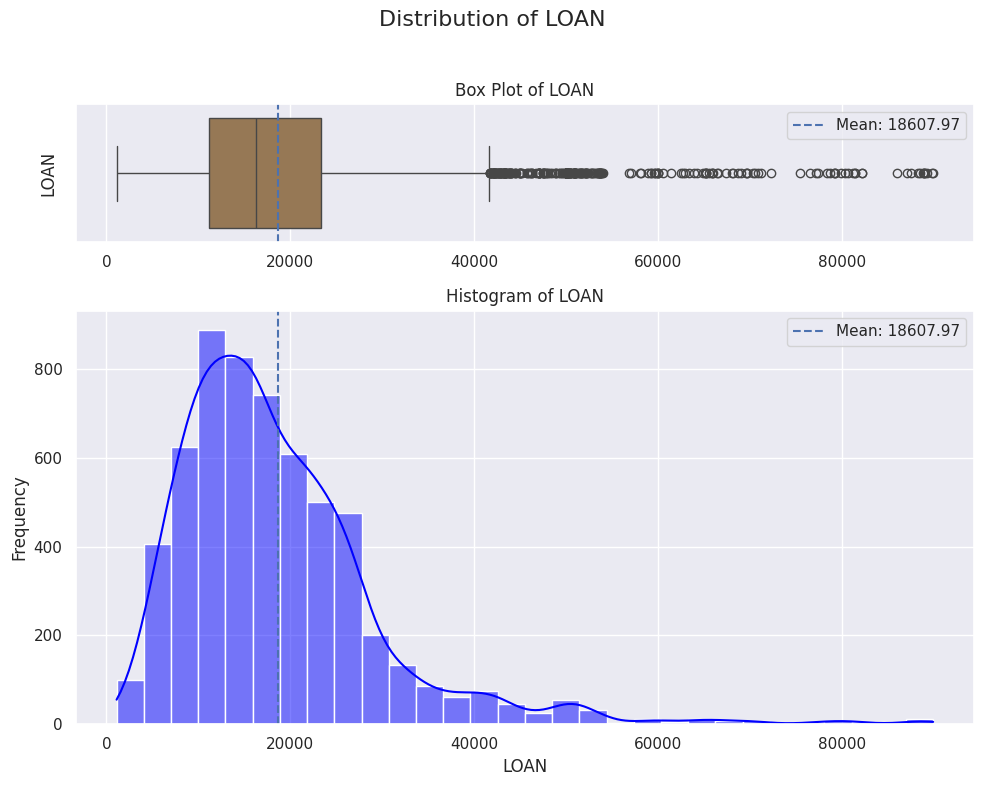

count     5960.000000
mean     18607.969799
std      11207.480417
min       1100.000000
25%      11100.000000
50%      16300.000000
75%      23300.000000
max      89900.000000
Name: LOAN, dtype: float64

In [ ]:
#Plotting a box plot and a histogram to analyze LOAN
box_n_hist (data, 'LOAN')

data['LOAN'].describe()

**Observations:**

The loan amount varies between 1100 and 89900. The distribution is right skewed and outliers are seen in the upper end.

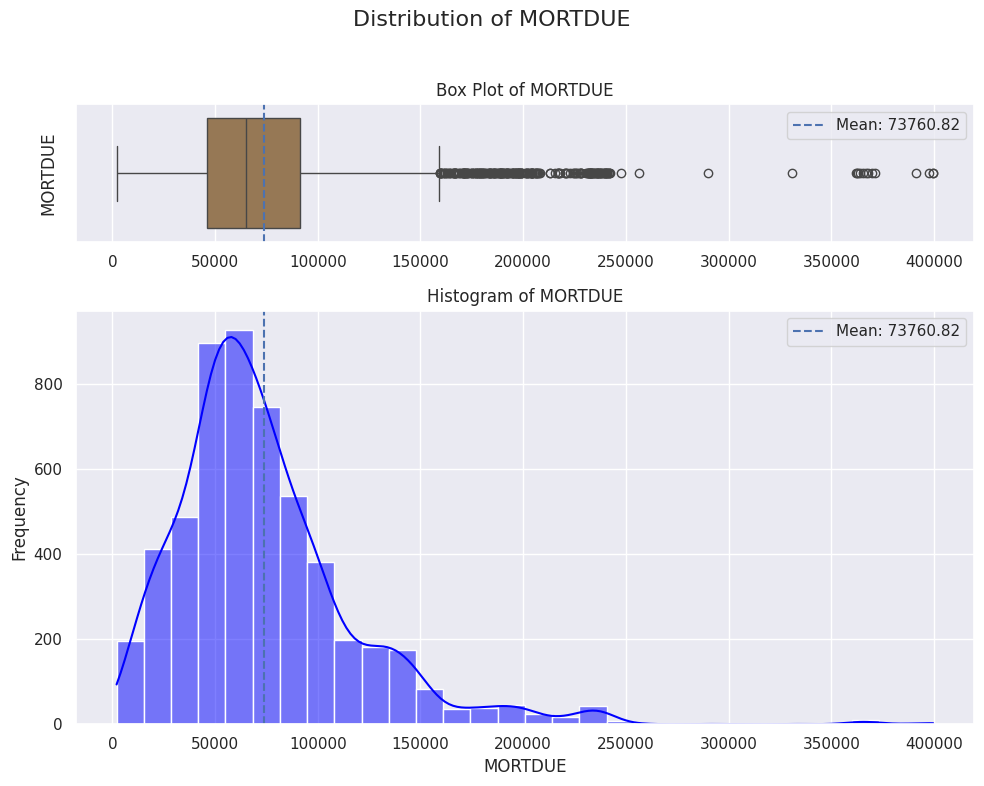

count      5442.000000
mean      73760.817200
std       44457.609458
min        2063.000000
25%       46276.000000
50%       65019.000000
75%       91488.000000
max      399550.000000
Name: MORTDUE, dtype: float64

In [ ]:
#Plotting a box plot and a histogram to analyze MORTUDE
box_n_hist (data, 'MORTDUE')

data['MORTDUE'].describe()

**Observations:**

The MORTDUE (amount due on existing mortgage) varies between 2062 and 399550. The distribution is right skewed and outliers are seen in the upper end.

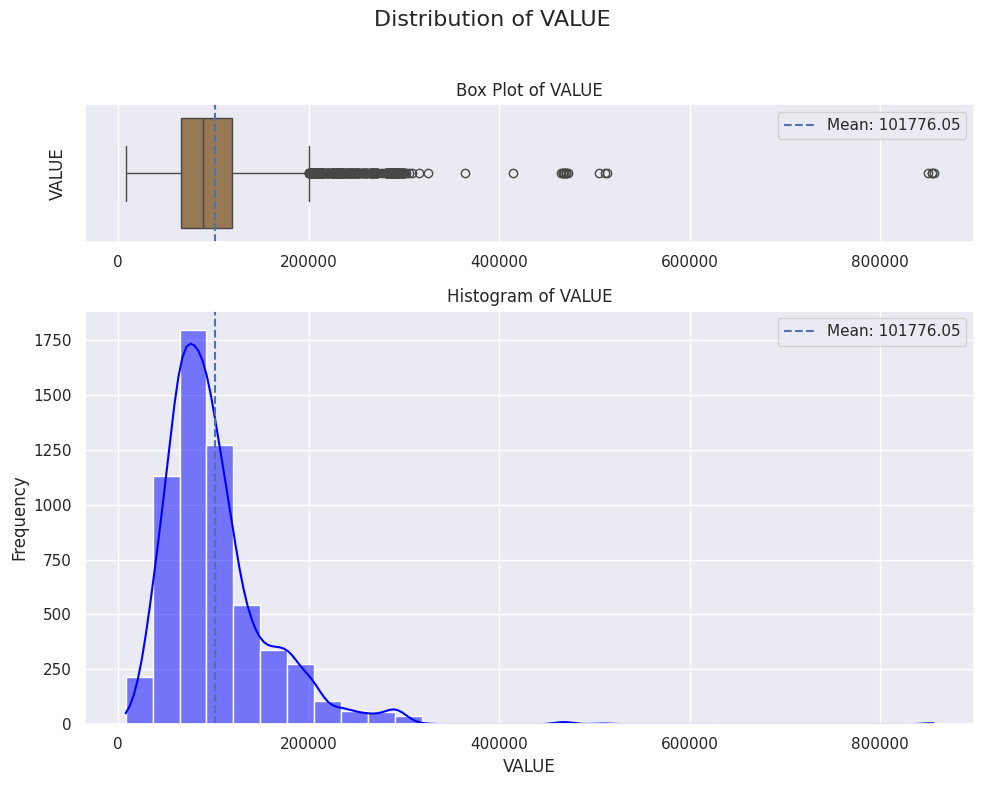

count      5848.000000
mean     101776.048741
std       57385.775334
min        8000.000000
25%       66075.500000
50%       89235.500000
75%      119824.250000
max      855909.000000
Name: VALUE, dtype: float64

In [ ]:
#Plotting a box plot and a histogram to analyze VALUE
box_n_hist (data, 'VALUE')

data['VALUE'].describe()

**Observations:**

The current value of the property data ranges between 8000 and 855909. The data is right skewed and outliers are seen on the upper end, above 200000.

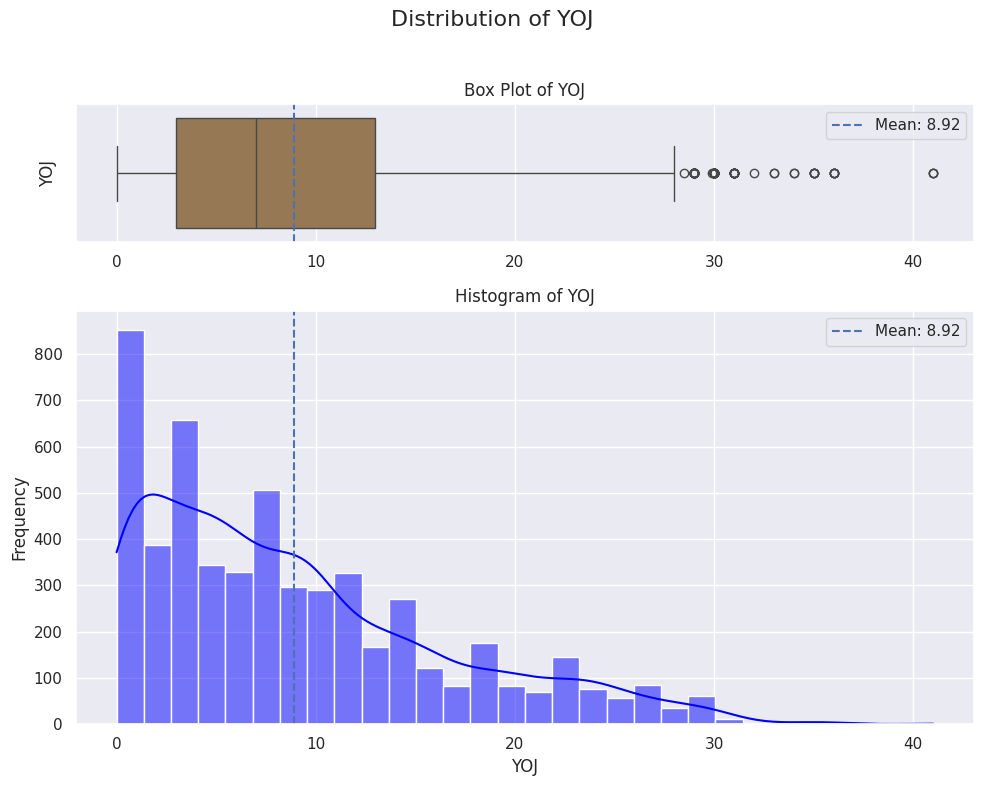

In [ ]:
#Plotting a box plot and a histogram to analyze YOJ
box_n_hist (data, 'YOJ')

**Observations:**

The number of years present at the job ranges between 0 to 40 with a mean of 8.92 and the distribution is right skewed.  

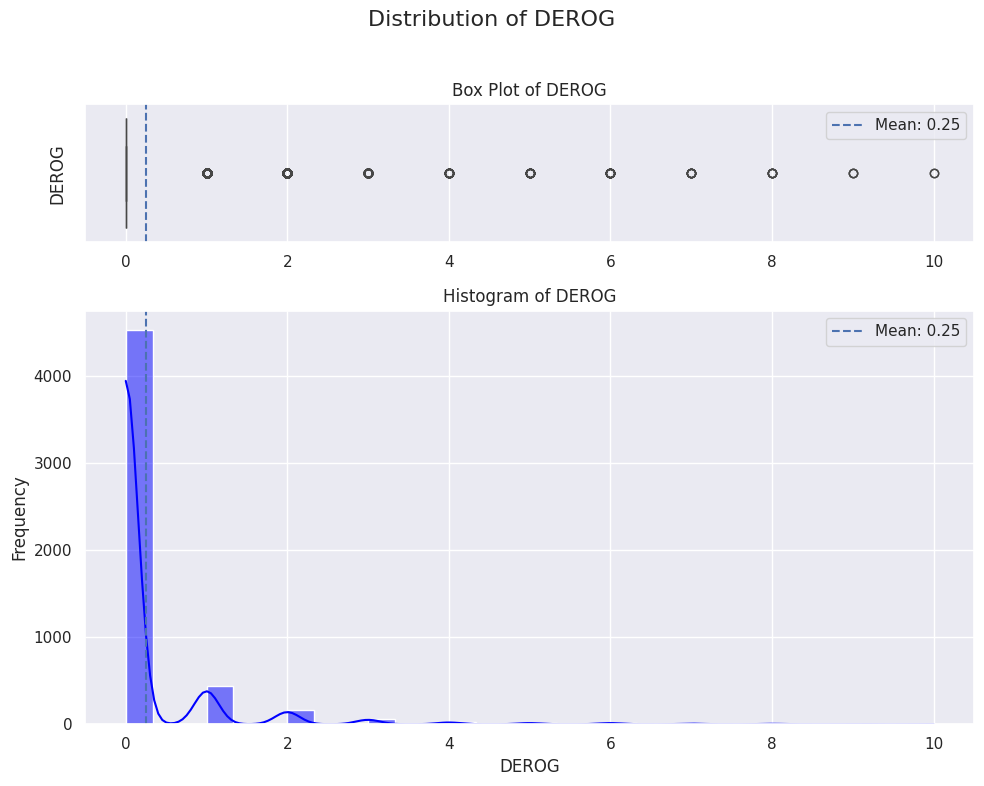

In [ ]:
#Plotting a box plot and a histogram to analyze DEROG
box_n_hist (data, 'DEROG')

In [ ]:
# Calculate the number of non-zero values in the 'DEROG' column
non_zero_count = (data['DEROG'] != 0).sum()

# Calculate the total number of records in data
total_count = len(data)

# Calculate the percentage of non-zero values
percentage_non_zero = (non_zero_count / total_count) * 100

# Count non-null and non-zero values in 'DEROG'
non_null_non_zero_count = ((data['DEROG'].notnull()) & (data['DEROG'] != 0)).sum()

# Calculate the percentage of non-null and non-zero values
percentage_non_null_non_zero = (non_null_non_zero_count / total_count) * 100

print(f"Percentage of non-zero values in 'DEROG': {percentage_non_zero:.2f}%")
print(f"Percentage of non-null and non-zero values in 'DEROG': {percentage_non_null_non_zero:.2f}%")

Percentage of non-zero values in 'DEROG': 24.04%
Percentage of non-null and non-zero values in 'DEROG': 12.16%


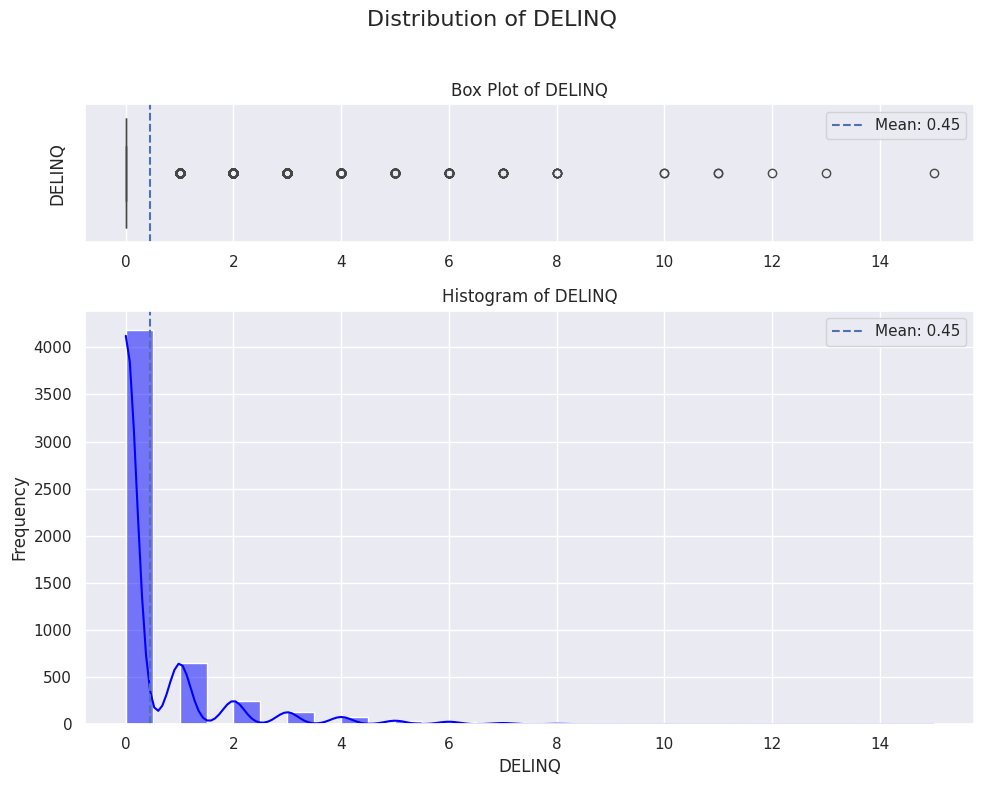

In [ ]:
#Plotting a box plot and a histogram to analyze DELINQ
box_n_hist (data, 'DELINQ')

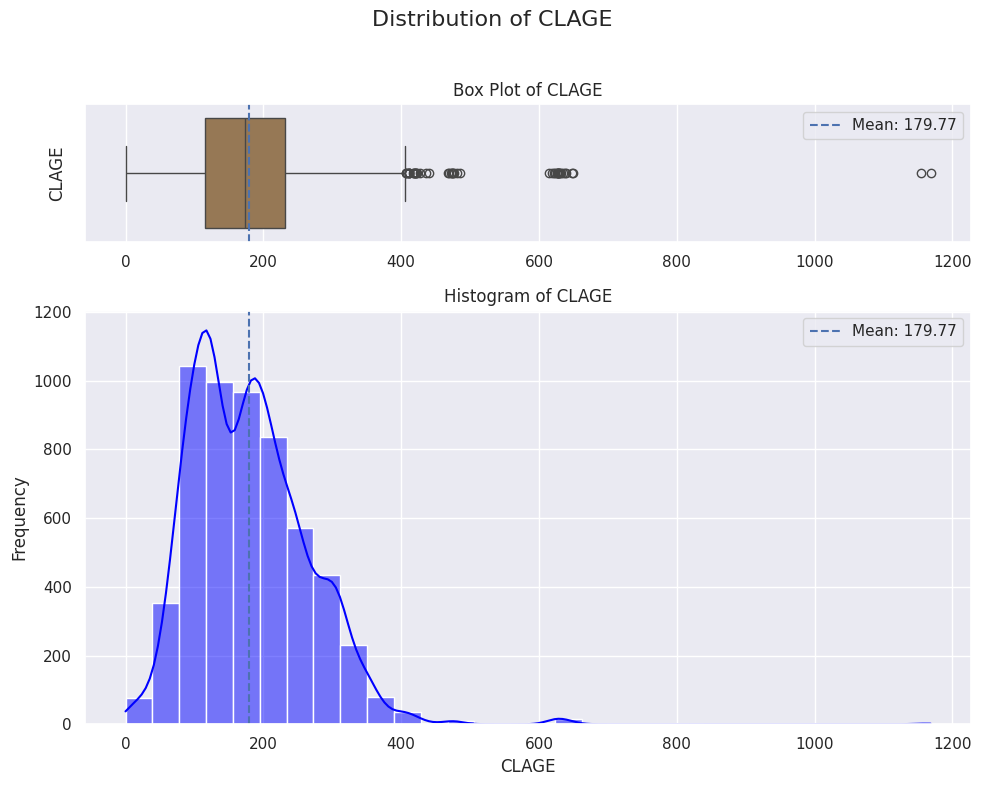

In [ ]:
#Plotting a box plot and a histogram to analyze CLAGE
box_n_hist (data, 'CLAGE')

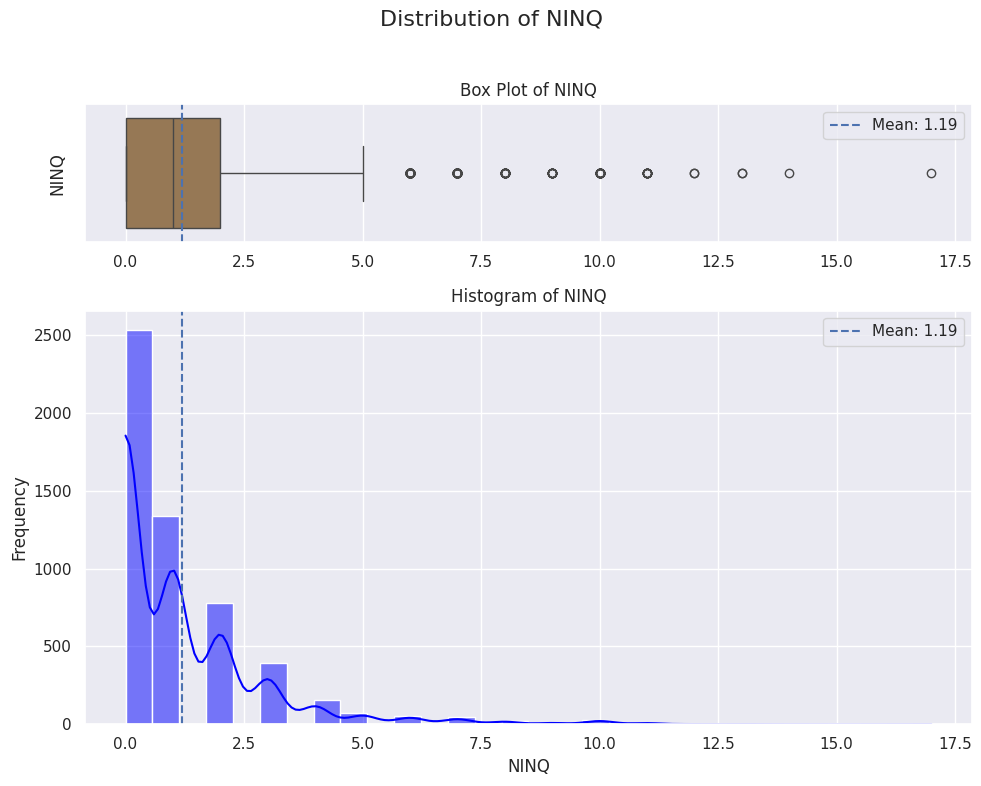

In [ ]:
#Plotting a box plot and a histogram to analyze NINQ
box_n_hist (data, 'NINQ')

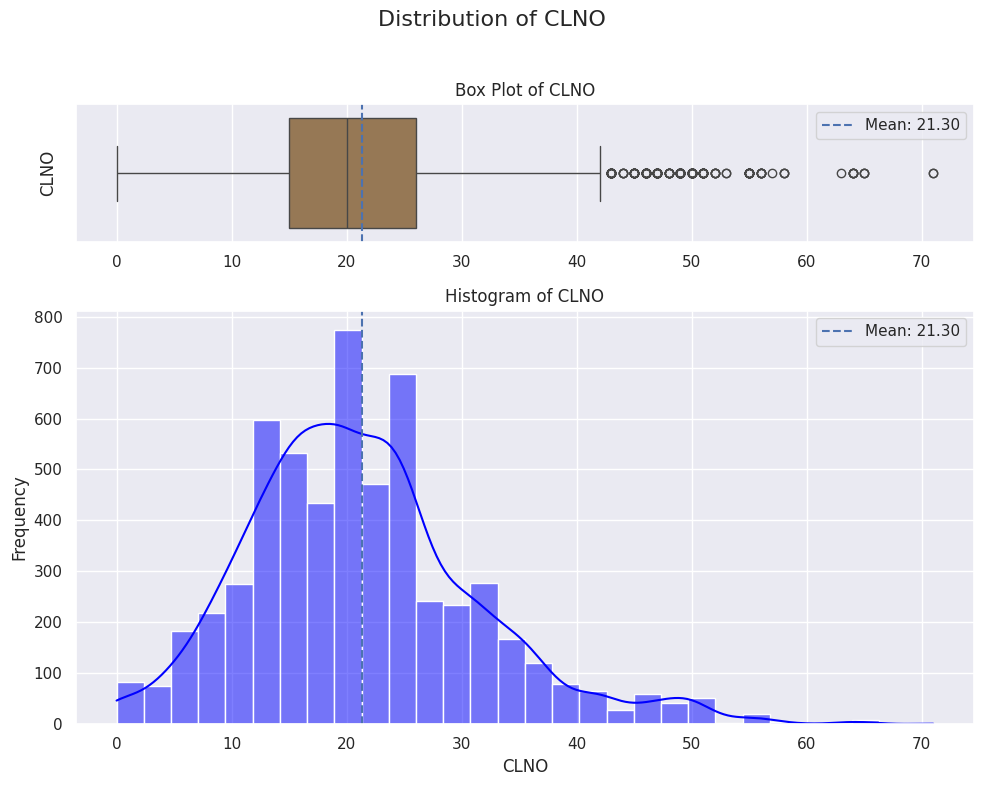

In [ ]:
#Plotting a box plot and a histogram to analyze CLNO
box_n_hist (data, 'CLNO')

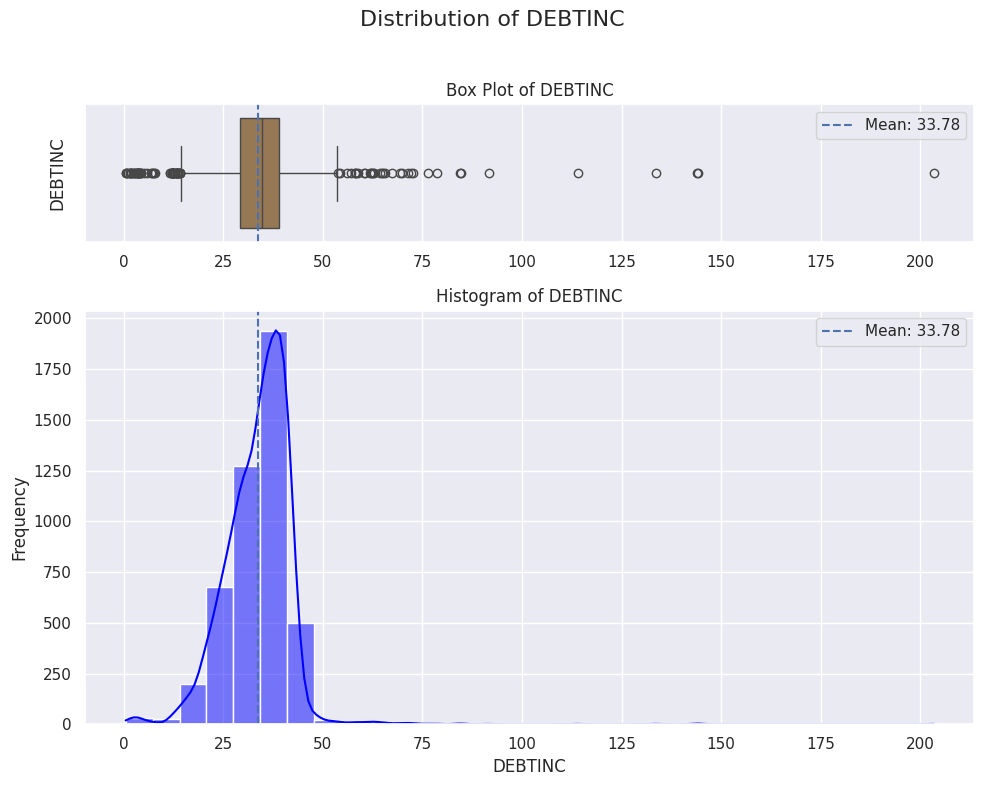

In [ ]:
#Plotting a box plot and a histogram to analyze DEBTINC
box_n_hist (data, 'DEBTINC')

**Observations:**

All numerical variables in the dataset, except the target variable (BAD), have outliers.

All numerical variables in the dataset, except the target variable (BAD), are skewed.

Except for DEBTINC, all other columns show positive skewness whereas DEBTINC show a slight negative skewness.

### **Bivariate Analysis**

#### BAD vs Categorical Variables

In [ ]:
#Writing the function to draw stack bars

# Defining colors for the 'BAD'
color_BAD = {0: '#6b8e23', 1: '#ff6f6f'}  # Duller green and red

# Function to create stacked bar charts for input variable against 'BAD'
def stacked_bars(df, input):
    # Create subplots
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=(f"Counts of 'BAD' by '{input}'", f"Percentage of Total 'BAD' by '{input}'"),
        specs=[[{'type': 'bar'}, {'type': 'bar'}]]  # Define the type of each subplot
    )

    # Create a crosstab of counts for the categorical feature and 'BAD'
    crosstab = pd.crosstab(df[input], df['BAD'])

    # Calculate percentages
    crosstab_percent = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

    # Add bar traces for counts
    for bad_value in crosstab.columns:
        fig.add_trace(
            go.Bar(
                x=crosstab.index,
                y=crosstab[bad_value],
                name=f'BAD={bad_value}',
                text=crosstab[bad_value],
                textposition='inside',
                insidetextanchor='middle',
                marker_color=color_BAD[bad_value]
            ),
            row=1, col=1
        )

    # Add bar traces for percentages
    for bad_value in crosstab_percent.columns:
        fig.add_trace(
            go.Bar(
                x=crosstab_percent.index,
                y=crosstab_percent[bad_value],
                name=f'BAD={bad_value}',
                text=[f"{v:.1f}%" for v in crosstab_percent[bad_value]],
                textposition='inside',
                insidetextanchor='middle',
                marker_color=color_BAD[bad_value]
            ),
            row=1, col=2
        )

    # Update layout settings
    fig.update_layout(
        barmode='stack',
        height=600,
        width=1200,
        title_text=f"Analysis of 'BAD' by '{input}'",
        title_x=0.5
    )

    # Update axis titles for each subplot
    fig.update_xaxes(title_text=input, row=1, col=1)
    fig.update_yaxes(title_text='Count', row=1, col=1)
    fig.update_xaxes(title_text=input, row=1, col=2)
    fig.update_yaxes(title_text='Percentage', row=1, col=2)

    fig.show()

In [ ]:
#Analysing BAD vs Reason
stacked_bars(data, 'REASON')

**Observations:**

A majority of loans are taken for Debt Consolidation. However it can be seen that from each individual reason is examined, about 19% of the loans taken for Debt Consolidation have defaulted and about 22% of loans taken for Home improvements have defaulted. Although defaults in loans taken for home improvements are slightly higher (by 3%), the default rates in both groups are very close to the current overall loan default rate of 20%. This indicates that it is likely the Reason variable does not have a heavy influence on Loans getting defaulted.

In [ ]:
#Analysing BAD vs Job
stacked_bars(data, 'JOB')

**Observations:**

From all job categories of clients, it can be seen that those how are in Sales have the highest loan default rate which is 35% followed by those who are self employed with a 30% default rate. Clients who are in Office work have the lowest which is 13%.

In [ ]:
#Analysing BAD vs Reason
stacked_bars(data, 'DELINQ')

**Observation:**

All clients with DELINQ above 5 have defaulted their loans. However this is a very small number of clients.

#### BAD vs Numerical Variables

In [ ]:
#Analysing BAD vs Reason
stacked_bars(data, 'DEROG')

In [ ]:
#Analysing BAD vs Reason
stacked_bars(data, 'CLNO')

In [ ]:
#Analysing BAD vs Reason
stacked_bars(data, 'NINQ')

**Observation:**

All clients with DEROG above 6 have defaulted their loans. All clients with DELINQ above 5 have defaulted their loans. All clients with NINQ above 11 have defaulted their loans. However, in all bove three cases, the count is low. Even though the count is low, it would be worth to investigate how those loans got approved at the first place with such high DEROGs, DELINQs and NINQs.

In [ ]:
#Writing the function to draw box plots

def box_plots(df, numerical_features, categorical_feature):
    # Determine the number of rows and columns for subplots
    num_features = len(numerical_features)
    num_col_count = 2  # Number of columns in subplot grid
    num_row_count = (num_features + num_col_count - 1) // num_col_count  # Calculate the number of rows needed

    # Create a figure and axes array
    fig, axes = plt.subplots(num_row_count, num_col_count, figsize=(12, num_row_count * 5))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    # Iterate over numerical features and create a box plot for each
    for i, feature in enumerate(numerical_features):
        sns.boxplot(
            x=categorical_feature,
            y=feature,
            data=df,
            hue=categorical_feature,
            ax=axes[i],
            palette={'Yes': '#ff6f6f', 'No': '#6b8e23'}  # Set color palette for categories
        )
        axes[i].set_title(f"Box Plot of '{feature}' by '{categorical_feature}'")
        axes[i].set_xlabel(categorical_feature)
        axes[i].set_ylabel('Value')

    # Hide any unused subplots
    for j in range(num_features, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout
    plt.tight_layout()
    plt.show()

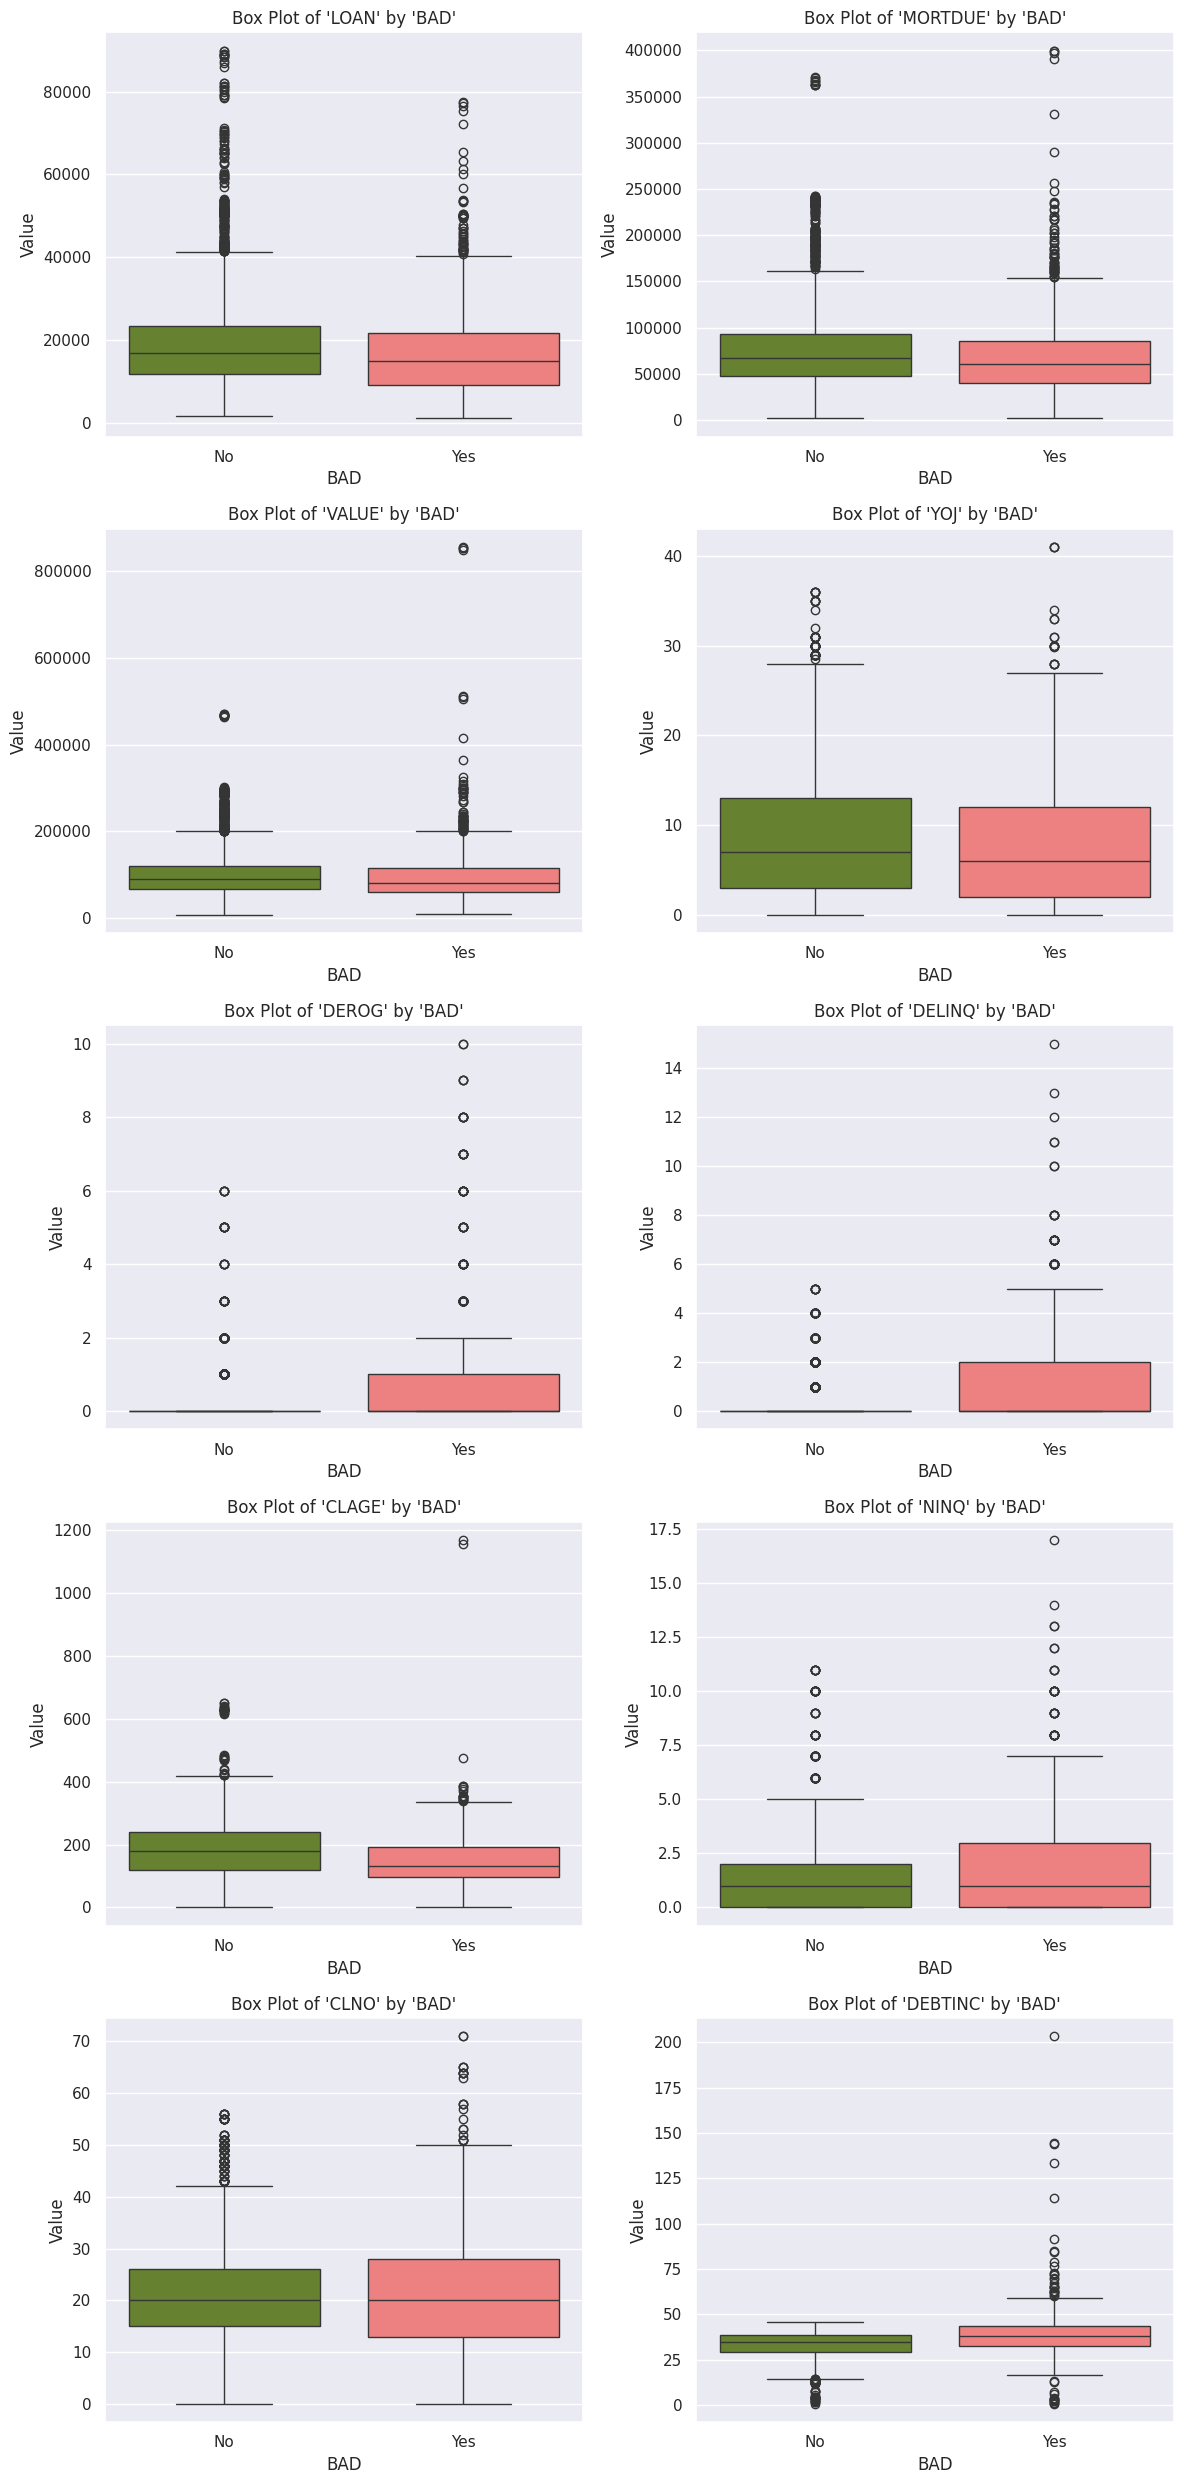

In [ ]:
#Numerical variables vs BAD

box_plots(dfc, num_colsC, 'BAD')

**Observation:**

from the above analysis it can be observed that that there is no significant difference in the loan amounts taken by those who defaulted vs those who did not.

From the above analysis it can be observed that that there is no significant difference in the MORTDUE (mortgage amounts) taken by those who defaulted vs those who did not.

From the above analysis it can be observed that that there is no significant difference in the VALUE (value of the property) taken by those who defaulted vs those who did not.

It can be seen that those with a higher DEBTINC and DELINQ have a slightly higher chance of loans being defaulted.

In [ ]:
#Analysing the relationship between BAD and VALUE

mean_values = data.groupby('BAD')['VALUE'].mean()
print("Mean values of properties by BAD status:")
print(mean_values)
print("Overall Mean values of VALUE:")
print(data['VALUE'].mean())

Mean values of properties by BAD status:
BAD
0    102595.921018
1     98172.846227
Name: VALUE, dtype: float64
Overall Mean values of VALUE:
101776.04874145007


In [ ]:
#Analysing the relationship between BAD and LOAN

mean_valuesL = data.groupby('BAD')['LOAN'].mean()
print("Mean values of loan amount by BAD status:")
print(mean_valuesL)
print("Overall Mean values of loan amount:")
print(data['LOAN'].mean())

Mean values of loan amount by BAD status:
BAD
0    19028.107315
1    16922.119428
Name: LOAN, dtype: float64
Overall Mean values of loan amount:
18607.96979865772


In [ ]:
#Analysing the relationship between BAD and MORTDUE

mean_valuesM = data.groupby('BAD')['MORTDUE'].mean()
print("Mean values of MORTDUE by BAD status:")
print(mean_valuesM)
print("Overall Mean values of MORTDUE:")
print(data['MORTDUE'].mean())

Mean values of MORTDUE by BAD status:
BAD
0    74829.249055
1    69460.452973
Name: MORTDUE, dtype: float64
Overall Mean values of MORTDUE:
73760.817199559


**Observations:**

No significant difference can be seen in the average loan amounts taken by those who defaulted the loan vs those who did not. The average loan amounts between the defaulted and non defaulted groups are very close to the overall average loan amount of the data set.

No significant difference can be seen in the average MORTDUE of those who defaulted the loan vs those who did not. The average MORTDUE between the defaulted and non defaulted groups are very close to the overall average MORTDUE of the data set.

Same is true for Value and  Year On the Job variables. Those variables, when segregated by BAD, shows no significant difference in the distrubution among defaulted vs non Defaulted loans.

All numerical variables when segregated by BAD, shows outliers.

All numerical variables except DEBTINC, show only upper end outliers. DEBTINC show lower end outliers for both BAD bategories and for BAD = yes, DEBTINC also show upper end outliers as well.


### **Multivariate Analysis**

In [ ]:
# Create scatter plot to analyse Value of the property, Loan amount and BAD
fig = px.scatter(dfc, x='VALUE', y='LOAN', color='BAD',
                 color_discrete_map={'Yes': '#ff6f6f', 'No': '#6b8e23'},
                 title='Scatter Plot of VALUE vs LOAN Colored by BAD')

fig.update_layout(
    xaxis_title='VALUE',
    yaxis_title='LOAN',
    legend_title='BAD'
)

# Show the plot
fig.show()

In [ ]:
# Create scatter plot to analyse Value of the property, MORTDUR (Amount due on the existing mortgage) and BAD
fig = px.scatter(dfc, x='VALUE', y='MORTDUE', color='BAD',
                 color_discrete_map={'Yes': '#ff6f6f', 'No': '#6b8e23'},
                 title='Scatter Plot of VALUE vs MORTDUE Colored by BAD')

fig.update_layout(
    xaxis_title='VALUE',
    yaxis_title='MORTDUE',
    legend_title='BAD'
)

# Show the plot
fig.show()

**Observations:**

A significant positive correlation can be seen between MORTUDE and VALUE

In [ ]:
# Create scatter plot to analyse Value of the property, Loan amount and BAD
fig = px.scatter(dfc, x='DEBTINC', y='CLAGE', color='BAD',
                 color_discrete_map={'Yes': '#ff6f6f', 'No': '#6b8e23'},
                 title='Scatter Plot of DEBTINC vs CLAGE Colored by BAD')

fig.update_layout(
    xaxis_title='DEBTINC',
    yaxis_title='CLAGE',
    legend_title='BAD'
)

# Show the plot
fig.show()

In [ ]:
# Calculate the number of records where DEBTINC > 45
DEBTINC_above_45 = dfc[dfc['DEBTINC'] > 45].shape[0]

print("Count of records with DEBTINC above 45:", DEBTINC_above_45)

Count of records with DEBTINC above 45: 84


**Observations:**

All 84 loans taken by clients with a DEBTINC above 45 have defaulted.

All loans taken by a client with a CLAGE above 5 have not defaulted.


In [ ]:
# Create scatter plot to analyse Value of the property, Loan amount and BAD
fig = px.scatter(dfc, x='DEBTINC', y='CLNO', color='BAD',
                 color_discrete_map={'Yes': '#ff6f6f', 'No': '#6b8e23'},
                 title='Scatter Plot of DEBTINC vs CLNO Colored by BAD')

fig.update_layout(
    xaxis_title='DEBTINC',
    yaxis_title='CLNO',
    legend_title='BAD'
)

# Show the plot
fig.show()

              BAD      LOAN   MORTDUE     VALUE       YOJ     DEROG    DELINQ  \
BAD      1.000000 -0.075099 -0.048219 -0.029954 -0.060238  0.276081  0.354107   
LOAN    -0.075099  1.000000  0.228595  0.335393  0.105728 -0.001302 -0.035144   
MORTDUE -0.048219  0.228595  1.000000  0.875666 -0.088480 -0.049516 -0.001044   
VALUE   -0.029954  0.335393  0.875666  1.000000  0.007759 -0.048689 -0.014103   
YOJ     -0.060238  0.105728 -0.088480  0.007759  1.000000 -0.065879  0.038153   
DEROG    0.276081 -0.001302 -0.049516 -0.048689 -0.065879  1.000000  0.211832   
DELINQ   0.354107 -0.035144 -0.001044 -0.014103  0.038153  0.211832  1.000000   
CLAGE   -0.170499  0.088540  0.140047  0.171238  0.201718 -0.083047  0.022488   
NINQ     0.174980  0.044487  0.031392 -0.004398 -0.071627  0.173934  0.067812   
CLNO    -0.004157  0.072631  0.323631  0.269149  0.024838  0.061884  0.164639   
DEBTINC  0.199835  0.084735  0.154939  0.132174 -0.055891  0.017065  0.052364   

            CLAGE      NINQ

<Axes: >

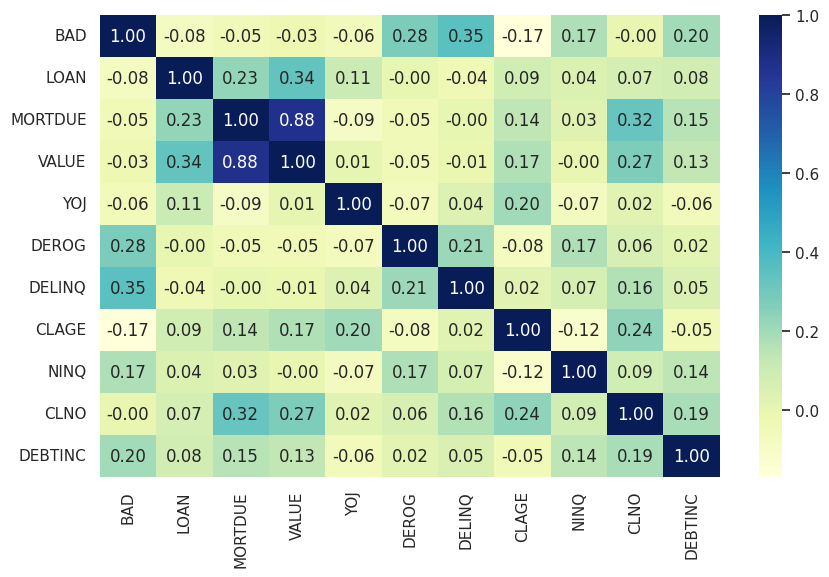

In [ ]:
#Testing for correlations among numerical variables
corr = data[num_cols].corr()
print(corr)

#PLotting a Heat map for correlations among variables
plt.figure(figsize = (10, 6))
sns.heatmap(corr, annot = True, cmap = 'YlGnBu',
        fmt = ".2f",
        xticklabels = corr.columns,
        yticklabels = corr.columns)

**Observations:**

A strong positive correlation can be seen among VALUE (current value of the property) and MORTDUE (amount due on the existing mortgage). One of the two variables will have to be removed due to the redundancy they can create of both fields were used in the model building. Although both variables are important, in the context of data modeling for loan default prediction, VALUE is likely more insightful and useful to the model as it provides a clearer understanding of the property’s financial standing. Removing MORTDUE simplifies the model and reduces redundancy, given that both features are highly correlated (0.88).

A slightly positive correlation is seen between LOAN and Value.

A slightly nagative correlation is seen among loan defaulting (BAD) and VALUE (current value of the property) but the correlation is not significant.  

Except for the strong positive correlation between VALUE and MORTDUE, no other pair of variables show a significant correlation among them.

## **Treating Missing Values**

Except for BAD and LOAN, all other columns have missing values in the data. From EDA it was found out that all numerical columns are skewed and therefore median imputation technique will be used to treat missing numerical values. Mode imputation will be used to treat missing categorical values.

From EDA it was found out that MORTDUE has a very strong positive correlation to VALUE and therefore MORTDUE will be dropped to avoid any redundencies.

In [ ]:
#Checking shape of the data before tearing missing values
data.shape

(5960, 13)

In [ ]:
#checking if there are rows where all specified columns are null, and removing them

col_list = ['VALUE', 'REASON',  'JOB', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']  #MORTDUE will not be considered because it will be dropped later
data_c0 = data.dropna(subset=col_list, how='all')
data_c0.shape

(5958, 13)

#### Removing MORTUDE due to high correlation with VALUE

In [ ]:
#Creating a new dataframe after dropping MORTDUE column

data_c1 = data_c0.copy()

# Drop the 'MORTDUE' column from the copied DataFrame
data_c1.drop(columns=['MORTDUE'], inplace=True)


In [ ]:
#Checking shape of data after dropping MORTDUE
data_c1.head()

BAD  LOAN     VALUE   REASON     JOB   YOJ  DEROG  DELINQ       CLAGE  \
0    1  1100   39025.0  HomeImp   Other  10.5    0.0     0.0   94.366667   
1    1  1300   68400.0  HomeImp   Other   7.0    0.0     2.0  121.833333   
2    1  1500   16700.0  HomeImp   Other   4.0    0.0     0.0  149.466667   
4    0  1700  112000.0  HomeImp  Office   3.0    0.0     0.0   93.333333   
5    1  1700   40320.0  HomeImp   Other   9.0    0.0     0.0  101.466002   

   NINQ  CLNO    DEBTINC  
0   1.0   9.0        NaN  
1   0.0  14.0        NaN  
2   1.0  10.0        NaN  
4   0.0  14.0        NaN  
5   1.0   8.0  37.113614

In [ ]:
#creating a copy of cleaned data for filling in missing values

data_c2 = data_c1.copy()
data_c2.head()

BAD  LOAN     VALUE   REASON     JOB   YOJ  DEROG  DELINQ       CLAGE  \
0    1  1100   39025.0  HomeImp   Other  10.5    0.0     0.0   94.366667   
1    1  1300   68400.0  HomeImp   Other   7.0    0.0     2.0  121.833333   
2    1  1500   16700.0  HomeImp   Other   4.0    0.0     0.0  149.466667   
4    0  1700  112000.0  HomeImp  Office   3.0    0.0     0.0   93.333333   
5    1  1700   40320.0  HomeImp   Other   9.0    0.0     0.0  101.466002   

   NINQ  CLNO    DEBTINC  
0   1.0   9.0        NaN  
1   0.0  14.0        NaN  
2   1.0  10.0        NaN  
4   0.0  14.0        NaN  
5   1.0   8.0  37.113614

#### Treating Missing Values

In Data Exploration, it was found out that

In [ ]:
# Function to fill missing categorical values with the mode
def fill_with_mode(df, columns):
    for column in columns:
        mode_value = df[column].mode()[0]  # Get the mode value (the first mode if there are multiple)
        df[column].fillna(mode_value, inplace=True)  # Fill missing values with the mode value

# List of categorical columns with missing values
cat_cols_with_missing = ['REASON', 'JOB']


# Fill missing values in specified columns
fill_with_mode(data_c2, cat_cols_with_missing)

In [ ]:
# Checking for missing values in each column
missing_vals = data_c2.isnull().sum()

print("Missing values in each column:")
print(missing_vals)

Missing values in each column:
BAD           0
LOAN          0
VALUE       110
REASON        0
JOB           0
YOJ         513
DEROG       706
DELINQ      578
CLAGE       306
NINQ        508
CLNO        220
DEBTINC    1265
dtype: int64


In [ ]:
#creating a copy of cleaned data for filling in missing values in numerical columns

data_c3 = data_c2.copy()
data_c3.head()

BAD  LOAN     VALUE   REASON     JOB   YOJ  DEROG  DELINQ       CLAGE  \
0    1  1100   39025.0  HomeImp   Other  10.5    0.0     0.0   94.366667   
1    1  1300   68400.0  HomeImp   Other   7.0    0.0     2.0  121.833333   
2    1  1500   16700.0  HomeImp   Other   4.0    0.0     0.0  149.466667   
4    0  1700  112000.0  HomeImp  Office   3.0    0.0     0.0   93.333333   
5    1  1700   40320.0  HomeImp   Other   9.0    0.0     0.0  101.466002   

   NINQ  CLNO    DEBTINC  
0   1.0   9.0        NaN  
1   0.0  14.0        NaN  
2   1.0  10.0        NaN  
4   0.0  14.0        NaN  
5   1.0   8.0  37.113614

In [ ]:
#creating a copy of cleaned data for filling in missing values in numerical columns
data_c3 = data_c2.copy()

# Dropping categorical variables
data_c3.drop(columns=['REASON','JOB'], inplace=True)

# Initializing the IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Fit and transform the imputer on the DataFrame
imputed_data = imputer.fit_transform(data_c3)

# Creating a new DataFrame with imputed values
data_c4 = pd.DataFrame(imputed_data, columns=data_c3.columns)

# Replace negative values with 0
data_c4 = data_c4.clip(lower=0)

In [ ]:
#Checking summary stats
data_c4.describe().T

count           mean           std          min           25%  \
BAD      5958.0       0.199396      0.399580     0.000000      0.000000   
LOAN     5958.0   18612.151729  11206.712480  1100.000000  11100.000000   
VALUE    5958.0  101723.860601  56965.943014  8000.000000  66370.000000   
YOJ      5958.0       8.987702      7.268666     0.000000      3.000000   
DEROG    5958.0       0.257559      0.798449     0.000000      0.000000   
DELINQ   5958.0       0.442211      1.077662     0.000000      0.000000   
CLAGE    5958.0     178.835597     83.892026     0.000000    116.684525   
NINQ     5958.0       1.181028      1.659433     0.000000      0.000000   
CLNO     5958.0      21.246466      9.963704     0.000000     15.000000   
DEBTINC  5958.0      34.421247      7.924785     0.524499     30.512046   

                  50%            75%            max  
BAD          0.000000       0.000000       1.000000  
LOAN     16350.000000   23300.000000   89900.000000  
VALUE    89425.500000  119732.500000  855909.000000  
YOJ          8.000000      12.570214      41.000000  
DEROG        0.000000       0.000000      10.000000  
DELINQ       0.000000       0.246653      15.000000  
CLAGE      172.891930     227.169364    1168.233561  
NINQ         1.000000       2.000000      17.000000  
CLNO        20.000000      26.000000      71.000000  
DEBTINC     35.532156      39.097616     203.312149

In [ ]:
# Checking for missing values in each column
missing_vals = data_c4.isnull().sum()

print("Missing values in each column:")
print(missing_vals)

Missing values in each column:
BAD        0
LOAN       0
VALUE      0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64


In [ ]:
# Specify the index to insert the columns from data_c2 into data_c1
index_to_insert = 3

# Select the columns from data2 that you want to add to data1
cols_to_add = ['REASON', 'JOB']

# Use iloc to select the columns from data_c2
cols_to_add_vals = data_c2[cols_to_add].values

# Insert the columns from data2 into data1 at the specified index
for idx, column_name in enumerate(cols_to_add):
    data_c4.insert(index_to_insert + idx, column_name, cols_to_add_vals[:, idx])

In [ ]:
#checking top 5 rows
data_c4.head()

BAD    LOAN     VALUE   REASON     JOB   YOJ  DEROG  DELINQ       CLAGE  \
0  1.0  1100.0   39025.0  HomeImp   Other  10.5    0.0     0.0   94.366667   
1  1.0  1300.0   68400.0  HomeImp   Other   7.0    0.0     2.0  121.833333   
2  1.0  1500.0   16700.0  HomeImp   Other   4.0    0.0     0.0  149.466667   
3  0.0  1700.0  112000.0  HomeImp  Office   3.0    0.0     0.0   93.333333   
4  1.0  1700.0   40320.0  HomeImp   Other   9.0    0.0     0.0  101.466002   

   NINQ  CLNO    DEBTINC  
0   1.0   9.0  36.104527  
1   0.0  14.0  36.410540  
2   1.0  10.0  36.057336  
3   0.0  14.0  31.824780  
4   1.0   8.0  37.113614

In [ ]:
#checking info after treatement
data_c4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5958 entries, 0 to 5957
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5958 non-null   float64
 1   LOAN     5958 non-null   float64
 2   VALUE    5958 non-null   float64
 3   REASON   5958 non-null   object 
 4   JOB      5958 non-null   object 
 5   YOJ      5958 non-null   float64
 6   DEROG    5958 non-null   float64
 7   DELINQ   5958 non-null   float64
 8   CLAGE    5958 non-null   float64
 9   NINQ     5958 non-null   float64
 10  CLNO     5958 non-null   float64
 11  DEBTINC  5958 non-null   float64
dtypes: float64(10), object(2)
memory usage: 558.7+ KB


              BAD      LOAN     VALUE       YOJ     DEROG    DELINQ     CLAGE  \
BAD      1.000000 -0.074688 -0.029937 -0.064267  0.283853  0.364470 -0.173884   
LOAN    -0.074688  1.000000  0.337937  0.114809 -0.000186 -0.034351  0.088187   
VALUE   -0.029937  0.337937  1.000000  0.000633 -0.041245 -0.006037  0.177041   
YOJ     -0.064267  0.114809  0.000633  1.000000 -0.060069  0.039309  0.217519   
DEROG    0.283853 -0.000186 -0.041245 -0.060069  1.000000  0.218161 -0.081152   
DELINQ   0.364470 -0.034351 -0.006037  0.039309  0.218161  1.000000  0.028288   
CLAGE   -0.173884  0.088187  0.177041  0.217519 -0.081152  0.028288  1.000000   
NINQ     0.178759  0.051813 -0.003483 -0.076943  0.187673  0.067426 -0.119534   
CLNO    -0.002912  0.076052  0.273316  0.018254  0.065742  0.168514  0.247461   
DEBTINC  0.294088  0.080792  0.137342 -0.075427  0.044630  0.108932 -0.063697   

             NINQ      CLNO   DEBTINC  
BAD      0.178759 -0.002912  0.294088  
LOAN     0.051813  0.076052 

<Axes: >

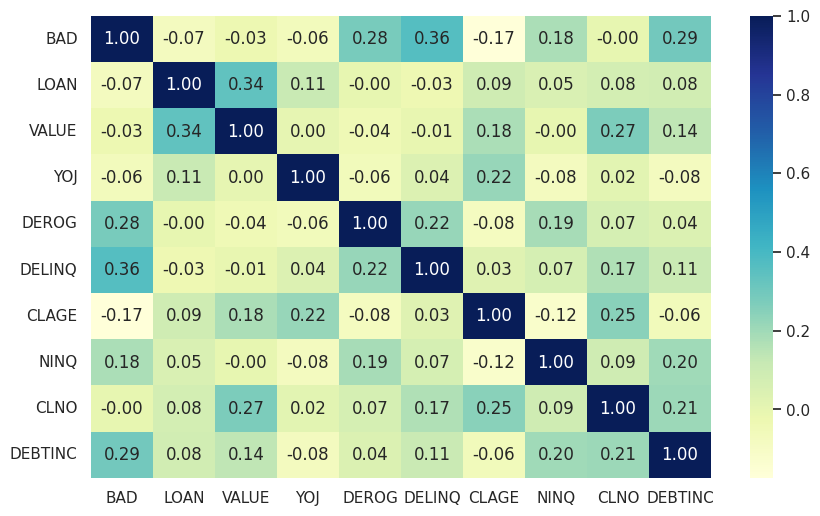

In [ ]:
# Creating list of Numerical Columns

num_cols_c4 = data_c4.select_dtypes(include=['int64', 'float64',]).columns.tolist()


#Testing for correlations among numerical variables
corr = data_c4[num_cols_c4].corr()
print(corr)

#PLotting a Heat map for correlations among variables
plt.figure(figsize = (10, 6))
sns.heatmap(corr, annot = True, cmap = 'YlGnBu',
        fmt = ".2f",
        xticklabels = corr.columns,
        yticklabels = corr.columns)

In [ ]:
# Calculate the number of non-zero values in the 'DEROG' column
non_zero_count4 = (data_c4['DEROG'] != 0).sum()

# Calculate the total number of records in data
total_count4 = len(data_c4)

# Calculate the percentage of non-zero values
percentage_non_zero4 = (non_zero_count / total_count) * 100

# Count non-null and non-zero values in 'DEROG'
non_null_non_zero_count4 = ((data_c4['DEROG'].notnull()) & (data_c4['DEROG'] != 0)).sum()

# Calculate the percentage of non-null and non-zero values
percentage_non_null_non_zero = (non_null_non_zero_count4 / total_count4) * 100

print(f"Percentage of non-zero values in 'DEROG': {percentage_non_zero:.2f}%")
print(f"Percentage of non-null and non-zero values in 'DEROG': {percentage_non_null_non_zero:.2f}%")

Percentage of non-zero values in 'DEROG': 24.04%
Percentage of non-null and non-zero values in 'DEROG': 23.80%


## **Treating Outliers**

It was noted in the univariate analysis that all numerical variables in the dataset have outliers. If these outliers are left untreated, it can affect the stability, interoretability and overall performance of the models that are being created.

from the three models, logostic regression, decision tree and random forest, random forests are more robust to outliers however even random forests performance can get impacted by outliers.

Therefore the outliers need to be treated before model building.

Capping technique will bebused to treat outliers.

In [ ]:
#Function to create boxplots

def func_boxplots(df, numerical_columns):
    # Determine the number of rows and columns for subplots
    num_features = len(numerical_columns)
    columns_per_row = 2  # Number of columns in subplot grid
    num_rows_required = (num_features + columns_per_row - 1) // columns_per_row  # Calculate number of rows needed

    # Create subplots
    fig = make_subplots(
        rows=num_rows_required, cols=columns_per_row,
        subplot_titles=[f'Box Plot of {col}' for col in numerical_columns],
        shared_xaxes=False,
        shared_yaxes=False,
        horizontal_spacing=0.1,
        vertical_spacing=0.1
    )

    # Add boxplot traces for each numerical column
    for idx, column in enumerate(numerical_columns):
        row = idx // columns_per_row + 1
        col = idx % columns_per_row + 1

        # Add box plot trace
        fig.add_trace(
            go.Box(
                y=df[column].dropna(),
                name=column,
                boxmean='sd',  # Show mean and standard deviation
            ),
            row=row, col=col
        )

    # Update layout settings
    fig.update_layout(
        title_text="Box Plots of Numerical Features",
        height=500 * num_rows_required,
        width=500 * columns_per_row,
        title_x=0.5
    )

    # Update axis titles
    for idx, column in enumerate(numerical_columns):
        row = idx // columns_per_row + 1
        col = idx % columns_per_row + 1
        fig.update_xaxes(title_text='Index', row=row, col=col)
        fig.update_yaxes(title_text=column, row=row, col=col)

    # Show the plot
    fig.show()

In [ ]:
#creating a list of all columns with outliers
outl_cols = ['LOAN',   'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

In [ ]:
# Visualizing outliers before treatement
func_boxplots(data_c4, outl_cols)

In [ ]:
#function to return upper and lower bounds of given columns

def iqr_bounds(df, numerical_columns):
    bounds = {}

    for column in numerical_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate upper and lower bounds
        upper_bound = Q3 + 1.5 * IQR
        lower_bound = Q1 - 1.5 * IQR

        # Ensure the lower bound is not less than the minimum value in the column
        #min_value = df[column].min()
        #if lower_bound < min_value:
            #lower_bound = min_value

        # Store the bounds for the column
        bounds[column] = {'upper_bound': upper_bound, 'lower_bound': lower_bound}

    return bounds

In [ ]:
#checking upper and lower bounds of outlier columns
iqr_bounds(data_c4, outl_cols)

{'LOAN': {'upper_bound': 41600.0, 'lower_bound': -7200.0},
 'VALUE': {'upper_bound': 199776.25, 'lower_bound': -13673.75},
 'YOJ': {'upper_bound': 26.925536108204646,
  'lower_bound': -11.355321664922787},
 'DEROG': {'upper_bound': 0.0, 'lower_bound': 0.0},
 'DELINQ': {'upper_bound': 0.6166333231894485,
  'lower_bound': -0.36997999391366915},
 'CLAGE': {'upper_bound': 392.89662244500005,
  'lower_bound': -49.04273287500003},
 'NINQ': {'upper_bound': 5.0, 'lower_bound': -3.0},
 'CLNO': {'upper_bound': 42.5, 'lower_bound': -1.5},
 'DEBTINC': {'upper_bound': 51.975972529236486,
  'lower_bound': 17.63368971850481}}

In [ ]:
#function to cap outliers at upper and lower bounds where needed

def cap_outliers(df, numerical_columns):
    # Create a copy of the DataFrame to avoid modifying the original data
    df_capped = df.copy()

    for column in numerical_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate upper and lower bounds
        upper_bound = Q3 + 1.5 * IQR
        lower_bound = Q1 - 1.5 * IQR

        # Ensure the lower bound is not less than the minimum value in the column
        #min_value = df[column].min()
        #if lower_bound < min_value:
            #lower_bound = min_value

        # Cap outliers
        df_capped[column] = df_capped[column].clip(lower=lower_bound, upper=upper_bound)

    return df_capped

In [ ]:
#Creating a new data set with outliers capped at lower and upper bound

df_capped = cap_outliers(data_c4, outl_cols)
df_capped.head()

BAD    LOAN     VALUE   REASON     JOB   YOJ  DEROG    DELINQ       CLAGE  \
0  1.0  1100.0   39025.0  HomeImp   Other  10.5    0.0  0.000000   94.366667   
1  1.0  1300.0   68400.0  HomeImp   Other   7.0    0.0  0.616633  121.833333   
2  1.0  1500.0   16700.0  HomeImp   Other   4.0    0.0  0.000000  149.466667   
3  0.0  1700.0  112000.0  HomeImp  Office   3.0    0.0  0.000000   93.333333   
4  1.0  1700.0   40320.0  HomeImp   Other   9.0    0.0  0.000000  101.466002   

   NINQ  CLNO    DEBTINC  
0   1.0   9.0  36.104527  
1   0.0  14.0  36.410540  
2   1.0  10.0  36.057336  
3   0.0  14.0  31.824780  
4   1.0   8.0  37.113614

In [ ]:
#Creating a copy of new data

data_c5 = df_capped.copy()

In [ ]:
# Visualizing outliers after treatement
func_boxplots(data_c5, outl_cols)

**Observatiosn:**

After outlier treatement, outliers are removed from the data set.

## **Important Insights from EDA**


**The current overall Loan Default rate is 19.9%** (approximately 20% of the loans default)

Based on this dataset, **there are two unique reasons why clients apply for a loan.** They are **DebtCon (Debt Consolidation) and HomeImp (Home Improvement)**. A 69% of all loans are currently taken for Debt Consolidation. Only 31% of loans taken are for home improvements.

When analysing the Reasons, when each individual reason is examined, **about 19% of the loans taken for Debt Consolidation have defaulted and about 22% of loans taken for Home improvements have defaulted.** Although defaults in loans taken for home improvements are slightly higher (by 3%), the default rates in both groups are very close to the current overall loan default rate of 20%. This indicates that **it is likely the Reason variable does not have a heavy influence on Loans getting defaulted.**

**The current client base belongs to 6 different job categories. A majority of the clients mentioned their job as 'Other'.**(The most common category among the clients is job type 'Other'. The clients belonging to a diverse group of jobs may indicate their job as other due to their job not falling into any other specified job role) Other job category is followed by ProfExe (23%) and Office (17%).

From all job categories of clients, it can be seen that **those how are in Sales have the highest loan default rate which is 35% followed by those who are self employed with a 30% default rate. Clients who are in Office work have the lowest which is 13%.**

The **loan amount varies between 1100 and 89900**. The distribution is right skewed and outliers are seen in the upper end.

**The number of years the client was present at the current job ranges between 0 to 40 with a mean of 8.92 and the distribution is right skewed.**  

The MORTDUE (amount due on existing mortgage) varies between 2062 and 399550. The distribution is right skewed and outliers are seen in the upper end.

The current value of the property data ranges between 8000 and 855909. The data is right skewed and outliers are seen on the upper end, above 200000.

All clients with **DEROG above 6** have defaulted their loans. All clients with **DELINQ above 5** have defaulted their loans. All clients with **NINQ above 11** have defaulted their loans. However, in all bove three cases, the count is low. Even though the count is low, it would be worth to investigate how those loans got approved at the first place with such high DEROGs, DELINQs and NINQs.

**All clients with a DEBTINC above 45 have defaulted their loans.** Unlike in the case of DEROG, DELINQ and NINQ, in the case of DEBTINC, the number is considerably high indicating that DEBTINC is a significant factor that should be considered when approving loans.

In the Bivariate analysis it was observed that that there is **no significant difference in the loan amounts taken by those who defaulted vs those who did not.**

In the Bivariate analysis it was observed that that there is **no significant difference in the MORTDUE (mortgage ammounts) taken by those who defaulted vs those who did not.**

In the Bivariate analysis it was observed that that there is **no significant difference in the VALUE (value of the property) of those who defaulted vs those who did not.**

No significant difference can be seen in the average loan amounts taken by those who defaulted the loan vs those who did not. The average loan amounts between the defaulted and non defaulted groups are very close to the overall average loan amount of the data set.

No significant difference can be seen in the average MORTDUE of those who defaulted the loan vs those who did not. The average MORTDUE between the defaulted and non defaulted groups are very close to the overall average MORTDUE of the data set.

Same is true for Value and  Year On the Job variables. Those variables, when segregated by BAD, shows no significant difference in the distribution among defaulted vs non Defaulted loans.

A **slightly negative correlation is seen among loan defaulting (BAD) and VALUE** (current value of the property) but the correlation is not significant.

A **strong positive correlation can be seen among VALUE (current value of the property) and MORTDUE (amount due on the existing mortgage)**. One of the two variables will have to be removed due to the redundancy they can create of both fields were used in the model building. Although both variables are important, in the context of data modeling for loan default prediction, VALUE is likely more insightful and useful to the model as it provides a clearer understanding of the property’s financial standing. **Therefore removing MORTDUE simplifies the model and reduces redundancy**, given that both features are highly correlated (0.88).

It was noted in the univariate analysis that **all numerical variables in the dataset, except the target variable (BAD), have outliers** and they were treated as needed for the model building. (technique used: capping the outliers)



## **Model Building - Approach**

The models
- Data preparation
- Partition the data into train and test set
- Build the model
- Fit on the train data
- Tune the model
- Test the model on test set

### Data preparation for model building

#### One Hot Encoding to convert categorical variables

In [ ]:
#Checking top 5 rows of data before encoding
data_c5.head()

BAD    LOAN     VALUE   REASON     JOB   YOJ  DEROG    DELINQ       CLAGE  \
0  1.0  1100.0   39025.0  HomeImp   Other  10.5    0.0  0.000000   94.366667   
1  1.0  1300.0   68400.0  HomeImp   Other   7.0    0.0  0.616633  121.833333   
2  1.0  1500.0   16700.0  HomeImp   Other   4.0    0.0  0.000000  149.466667   
3  0.0  1700.0  112000.0  HomeImp  Office   3.0    0.0  0.000000   93.333333   
4  1.0  1700.0   40320.0  HomeImp   Other   9.0    0.0  0.000000  101.466002   

   NINQ  CLNO    DEBTINC  
0   1.0   9.0  36.104527  
1   0.0  14.0  36.410540  
2   1.0  10.0  36.057336  
3   0.0  14.0  31.824780  
4   1.0   8.0  37.113614

In [ ]:
# Identify columns for encoding
cols_to_encode = ['JOB', 'REASON']

#Copying the data before encoding
data_c9 = data_c5.copy()

# Perform one-hot encoding
data_c9 = pd.get_dummies(data_c9, columns=['JOB', 'REASON'])

data_c9.head()

BAD    LOAN     VALUE   YOJ  DEROG    DELINQ       CLAGE  NINQ  CLNO  \
0  1.0  1100.0   39025.0  10.5    0.0  0.000000   94.366667   1.0   9.0   
1  1.0  1300.0   68400.0   7.0    0.0  0.616633  121.833333   0.0  14.0   
2  1.0  1500.0   16700.0   4.0    0.0  0.000000  149.466667   1.0  10.0   
3  0.0  1700.0  112000.0   3.0    0.0  0.000000   93.333333   0.0  14.0   
4  1.0  1700.0   40320.0   9.0    0.0  0.000000  101.466002   1.0   8.0   

     DEBTINC  JOB_Mgr  JOB_Office  JOB_Other  JOB_ProfExe  JOB_Sales  \
0  36.104527    False       False       True        False      False   
1  36.410540    False       False       True        False      False   
2  36.057336    False       False       True        False      False   
3  31.824780    False        True      False        False      False   
4  37.113614    False       False       True        False      False   

   JOB_Self  REASON_DebtCon  REASON_HomeImp  
0     False           False            True  
1     False           False            True  
2     False           False            True  
3     False           False            True  
4     False           False            True

In [ ]:
#Checking info of the dataset after encoding
data_c9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5958 entries, 0 to 5957
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BAD             5958 non-null   float64
 1   LOAN            5958 non-null   float64
 2   VALUE           5958 non-null   float64
 3   YOJ             5958 non-null   float64
 4   DEROG           5958 non-null   float64
 5   DELINQ          5958 non-null   float64
 6   CLAGE           5958 non-null   float64
 7   NINQ            5958 non-null   float64
 8   CLNO            5958 non-null   float64
 9   DEBTINC         5958 non-null   float64
 10  JOB_Mgr         5958 non-null   bool   
 11  JOB_Office      5958 non-null   bool   
 12  JOB_Other       5958 non-null   bool   
 13  JOB_ProfExe     5958 non-null   bool   
 14  JOB_Sales       5958 non-null   bool   
 15  JOB_Self        5958 non-null   bool   
 16  REASON_DebtCon  5958 non-null   bool   
 17  REASON_HomeImp  5958 non-null   b

In [ ]:
# Creating list of Numerical Columns from the encoded dataset

num_cols_c9 = data_c9.select_dtypes(include=['int64', 'float64',]).columns.tolist()
num_cols_c9

['BAD',
 'LOAN',
 'VALUE',
 'YOJ',
 'DEROG',
 'DELINQ',
 'CLAGE',
 'NINQ',
 'CLNO',
 'DEBTINC']

#### Splitting data

In [ ]:
#Copying the data before splitting
data_c10 = data_c9.copy()
data_c10.shape

(5958, 18)

In [ ]:
# Separating target variable from other variables

Y= data_c10.BAD
X= data_c10.drop(columns = ['BAD'])

In [ ]:
#Checking the proportion between the classes in target variable (BAD)
data_c10['BAD'].value_counts(normalize=True)

BAD
0.0    0.800604
1.0    0.199396
Name: proportion, dtype: float64

**Observation:**

the dataset is imbalanced and the target variable has a below propotions among classes.

Class 0: 80%

Class 1: 20%

In [ ]:
# Splitting the data (Stratify Yes because the data is imbalanced so to make sure each class gets passed into train and test sets)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

In [ ]:
# Checking that no column has missing values in train or test sets
print(x_train.isna().sum())
print('-'*30)
print(x_test.isna().sum())

LOAN              0
VALUE             0
YOJ               0
DEROG             0
DELINQ            0
CLAGE             0
NINQ              0
CLNO              0
DEBTINC           0
JOB_Mgr           0
JOB_Office        0
JOB_Other         0
JOB_ProfExe       0
JOB_Sales         0
JOB_Self          0
REASON_DebtCon    0
REASON_HomeImp    0
dtype: int64
------------------------------
LOAN              0
VALUE             0
YOJ               0
DEROG             0
DELINQ            0
CLAGE             0
NINQ              0
CLNO              0
DEBTINC           0
JOB_Mgr           0
JOB_Office        0
JOB_Other         0
JOB_ProfExe       0
JOB_Sales         0
JOB_Self          0
REASON_DebtCon    0
REASON_HomeImp    0
dtype: int64


In [ ]:
#checking the data splits
print("Shape of Training set : \n", x_train.shape)
print("Shape of test set : \n", x_test.shape)
print()
print("% of classes in training set:")
print(y_train.value_counts(normalize=True))

print()
print("% of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set : 
 (4170, 17)
Shape of test set : 
 (1788, 17)

% of classes in training set:
BAD
0.0    0.800719
1.0    0.199281
Name: proportion, dtype: float64

% of classes in test set:
BAD
0.0    0.800336
1.0    0.199664
Name: proportion, dtype: float64


**Observations:**

Same proportions seen between the two classes in the total dataset, is seen in between the two classes in the test and training data sets as expected.

#### Creating functions to compare resulst

In [ ]:
# Creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(6,5))

    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## **Logistic Regression**

In [ ]:
# Define the logistic regression model
model = LogisticRegression(max_iter=1000)

In [ ]:
# Fit the model on the training data
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Predict for the train set
y_train_pred = model.predict(x_train)


Training Set Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.97      0.89      3339
         1.0       0.54      0.14      0.22       831

    accuracy                           0.81      4170
   macro avg       0.68      0.55      0.55      4170
weighted avg       0.76      0.81      0.75      4170



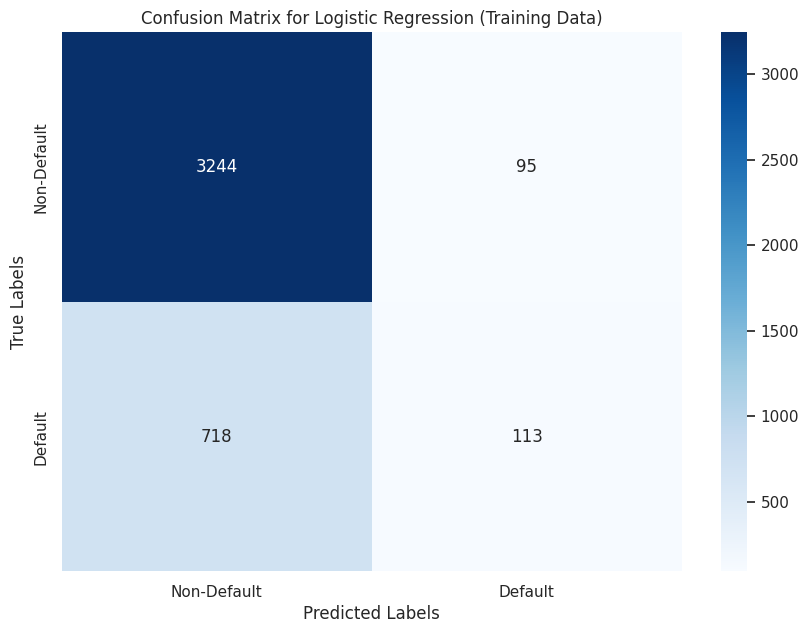

In [ ]:
# Print classification report for training data
print("\nTraining Set Classification Report:\n", classification_report(y_train, y_train_pred))

# Compute confusion matrix for training data
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

# Plot confusion matrix for training data
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap=plt.cm.Blues,
            xticklabels=['Non-Default', 'Default'], yticklabels=['Non-Default', 'Default'])
plt.title('Confusion Matrix for Logistic Regression (Training Data)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
# Make predictions on the test set
y_test_pred = model.predict(x_test)


Test Set Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.98      0.89      1431
         1.0       0.54      0.11      0.19       357

    accuracy                           0.80      1788
   macro avg       0.68      0.54      0.54      1788
weighted avg       0.76      0.80      0.75      1788



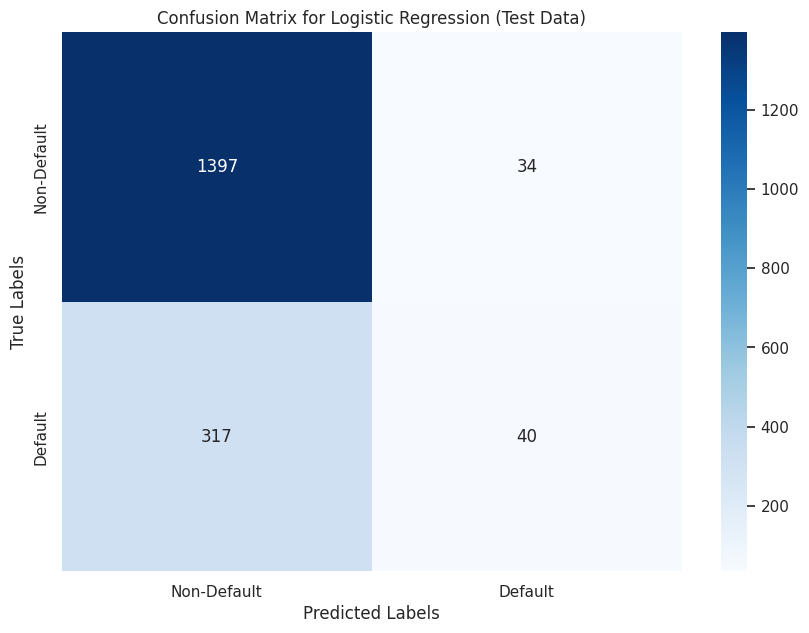

In [ ]:
# Print classification report for test data
print("\nTest Set Classification Report:\n", classification_report(y_test, y_test_pred))

# Compute confusion matrix for test data
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for test data
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap=plt.cm.Blues,
            xticklabels=['Non-Default', 'Default'], yticklabels=['Non-Default', 'Default'])
plt.title('Confusion Matrix for Logistic Regression (Test Data)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
# Print the coefficients of the logistic regression model
coefficients = pd.DataFrame(model.coef_[0], index=X.columns, columns=['Coefficient'])
print("\nLogistic Regression Coefficients:\n")
print(coefficients)


Logistic Regression Coefficients:

                Coefficient
LOAN              -0.000034
VALUE             -0.000005
YOJ               -0.016269
DEROG              0.000000
DELINQ             0.005457
CLAGE             -0.008516
NINQ               0.009507
CLNO              -0.012295
DEBTINC            0.042369
JOB_Mgr            0.000493
JOB_Office        -0.002129
JOB_Other         -0.001184
JOB_ProfExe       -0.000502
JOB_Sales          0.000396
JOB_Self           0.000731
REASON_DebtCon    -0.002012
REASON_HomeImp    -0.000183


**Observations:**

By analysing the coefficients, it is observed that a higher DEBTINC (debt to income ratio) significantly increases the likeliness of a loan to defaul. According to the logidtic regression results, a higher DEBTINC indicates a higher likelihood for the loan to default. It is understandable as a higher debt relative to income can indicate financial stress.

It can also be observed that DEROG has a 0 coeficinet indicating it has no impact on loans defaulting.

Other than above mentioned features, DELINQ, NINQ, JOB_Mgr, JOB_Sales and JOB_Self positively impact the possibility of a loan to default whereas the remaining features have a negative impact.

However the recall on training data is 14% which is very low and on test data it is even lower (11%). The model needs to be improved by identifying the optimal threshold.

#### Improving the Logistic Regression model

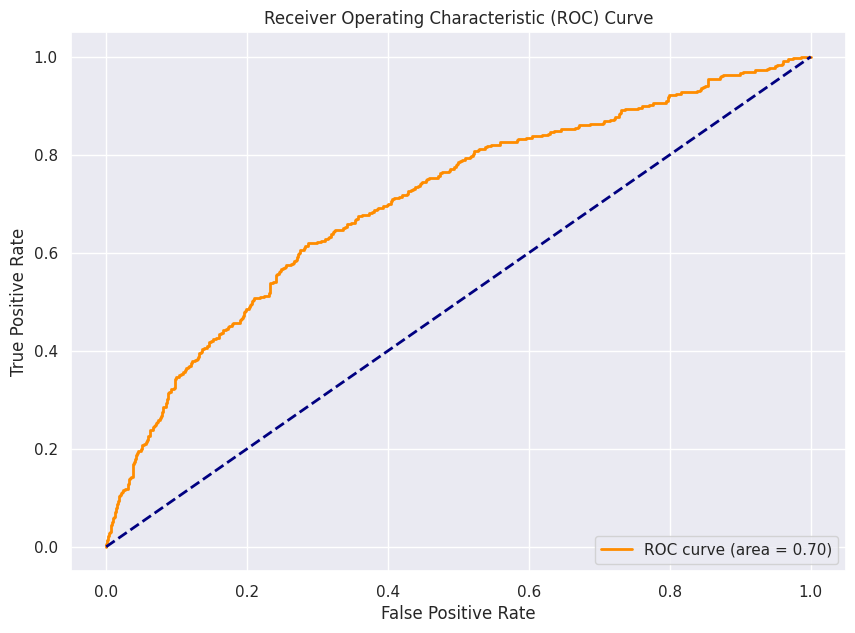

Optimal Threshold: 0.2436910622255725


In [ ]:
#Plotting ROC Curve

# Predict probabilities for the test set
y_test_prob = model.predict_proba(x_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Find the optimal threshold (closest to the top-left corner)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f'Optimal Threshold: {optimal_threshold}')

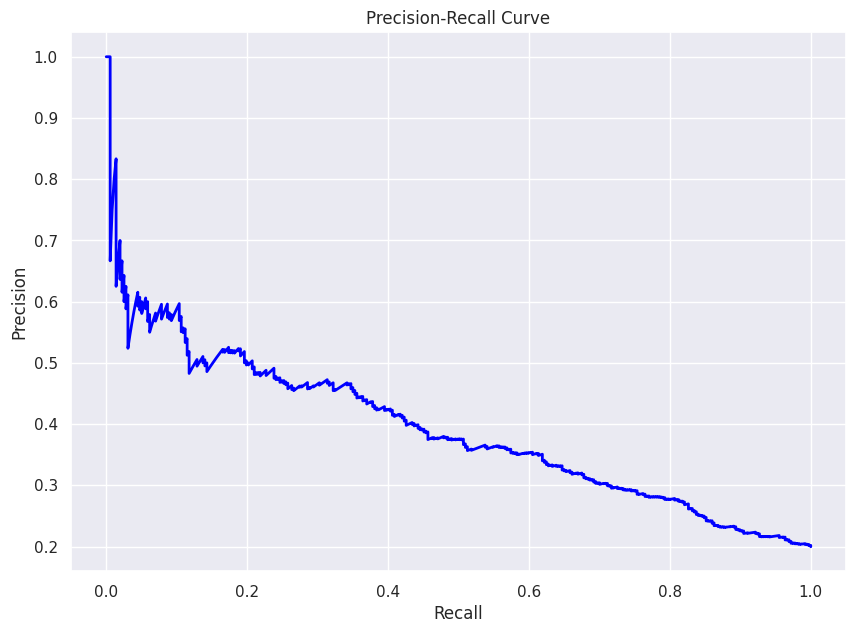

Optimal Threshold based on F1 score: 0.2436910622255725


In [ ]:
#Plotting precision recall curve

# Calculate the Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_test_prob)

# Plot the Precision-Recall curve
plt.figure(figsize=(10, 7))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Find the optimal threshold (could be chosen based on F1 score or other criteria)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print(f'Optimal Threshold based on F1 score: {optimal_threshold}')

In [ ]:
#Evaluating Metrics at Different Thresholds
thresholds = np.arange(0.0, 1.1, 0.1)
metrics = []

for threshold in thresholds:
    y_pred = (y_test_prob >= threshold).astype(int)
    accuracy = (y_pred == y_test).mean()
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    metrics.append((threshold, accuracy, precision, recall))

metrics_df = pd.DataFrame(metrics, columns=['Threshold', 'Accuracy', 'Precision', 'Recall'])
print(metrics_df)

    Threshold  Accuracy  Precision    Recall
0         0.0  0.199664   0.199664  1.000000
1         0.1  0.396532   0.232196  0.876751
2         0.2  0.617450   0.303249  0.705882
3         0.3  0.748322   0.388489  0.453782
4         0.4  0.791387   0.460396  0.260504
5         0.5  0.803691   0.540541  0.112045
6         0.6  0.800895   0.523810  0.030812
7         0.7  0.802573   0.833333  0.014006
8         0.8  0.800895   1.000000  0.002801
9         0.9  0.800336   0.000000  0.000000
10        1.0  0.800336   0.000000  0.000000



Training Set Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.70      0.78      3339
         1.0       0.33      0.61      0.43       831

    accuracy                           0.68      4170
   macro avg       0.60      0.65      0.60      4170
weighted avg       0.77      0.68      0.71      4170



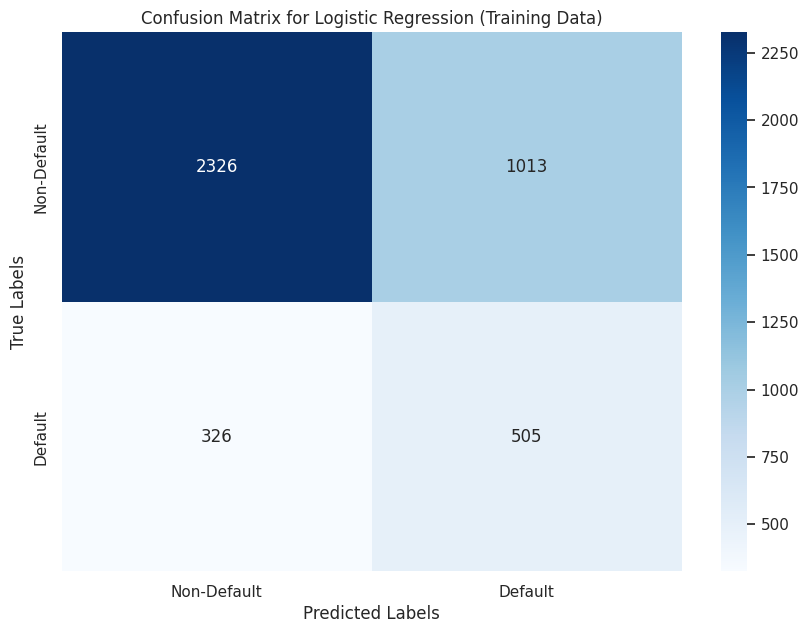

In [ ]:
#Appliying optimal threshold to training data on logistic regression

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Fit the model on the training data
model.fit(x_train, y_train)

# Predict probabilities for the train set
y_train_prob = model.predict_proba(x_train)[:, 1]

# Predict probabilities for the test set
y_test_prob = model.predict_proba(x_test)[:, 1]

# Apply the optimal threshold to get binary predictions
threshold = 0.2436910622255725

# Predict for the train set using the optimal threshold
y_train_pred = (y_train_prob >= threshold).astype(int)

# Check performance on the train dataset
print("\nTraining Set Classification Report:\n", classification_report(y_train, y_train_pred))

# Compute and plot confusion matrix for training data
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap=plt.cm.Blues,
            xticklabels=['Non-Default', 'Default'], yticklabels=['Non-Default', 'Default'])
plt.title('Confusion Matrix for Logistic Regression (Training Data)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Test Set Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.71      0.79      1431
         1.0       0.35      0.62      0.45       357

    accuracy                           0.70      1788
   macro avg       0.62      0.67      0.62      1788
weighted avg       0.78      0.70      0.72      1788



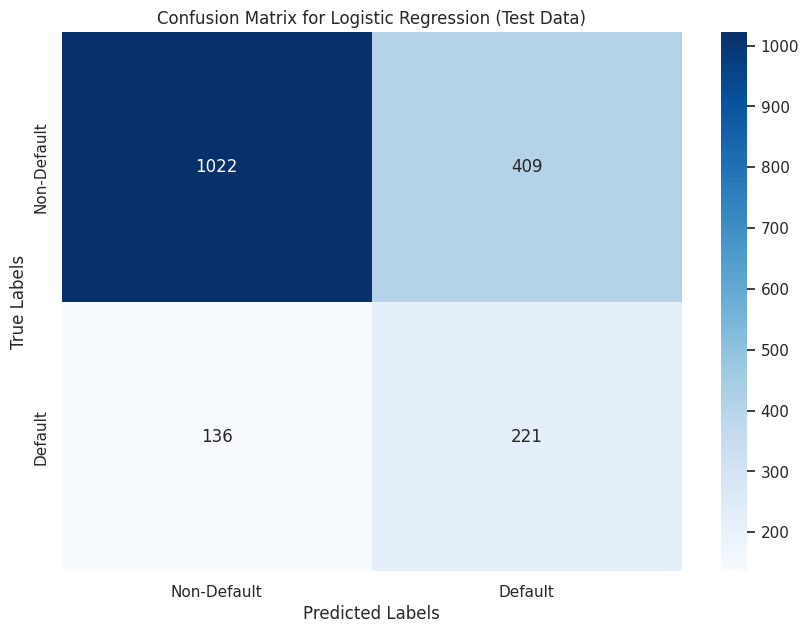

In [ ]:
#applying optimal threshold for test data

# Predict for the test set using the optimal threshold
y_test_pred = (y_test_prob >= threshold).astype(int)

# Check performance on the test dataset
print("\nTest Set Classification Report:\n", classification_report(y_test, y_test_pred))

# Compute and plot confusion matrix for test data
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap=plt.cm.Blues,
            xticklabels=['Non-Default', 'Default'], yticklabels=['Non-Default', 'Default'])
plt.title('Confusion Matrix for Logistic Regression (Test Data)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
#Coefficients for optimal threshold

# Print the coefficients of logistic regression
coefficients = pd.DataFrame(model.coef_[0], index=X.columns, columns=['Coefficient'])
print("\nLogistic Regression Coefficients:\n")
print(coefficients)


Logistic Regression Coefficients:

                Coefficient
LOAN              -0.000034
VALUE             -0.000005
YOJ               -0.016269
DEROG              0.000000
DELINQ             0.005457
CLAGE             -0.008516
NINQ               0.009507
CLNO              -0.012295
DEBTINC            0.042369
JOB_Mgr            0.000493
JOB_Office        -0.002129
JOB_Other         -0.001184
JOB_ProfExe       -0.000502
JOB_Sales          0.000396
JOB_Self           0.000731
REASON_DebtCon    -0.002012
REASON_HomeImp    -0.000183


**Observations:**

The new and improved recall on training data is 61% and the new recall on test data 62%. On test data the model has an overall accuracy of 70% with a 45% F1 score. The model has significantly improved after applying maximum threshold.

By analysing the coefficients after optimal threshold application, it is observed that, still, a higher DEBTINC (debt to income ratio) significantly increases the likeliness of a loan to defaul. It is understandable as a higher debt relative to income can indicate financial stress.

Even after optimal threshold application, DEROG has a 0 coeficinet confirming it has no impact on loans defaulting.

Same as earlier, other than above mentioned features, DELINQ, NINQ, JOB_Mgr, JOB_Sales and JOB_Self positively impact the possibility of a loan to default whereas the remaining features have a negative impact. But other modeling techniques will be tried out to see if they can acheive better results.

## **Decision Tree**

Since the data set is imbalanced, to avoid decision tree getting biased towards the dominant class, class weights can be introduced.

**Data proportions:**

Class 0: 0.800 (approx. 80%)

Class 1: 0.199 (approx. 20%)

**Class weights:**

Class 0: 0.2

Class 1: 0.8

In [ ]:
# Building decision tree model with class weights
dtree = DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)

In [ ]:
# Fitting decision tree model to training data
dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3339
         1.0       1.00      1.00      1.00       831

    accuracy                           1.00      4170
   macro avg       1.00      1.00      1.00      4170
weighted avg       1.00      1.00      1.00      4170



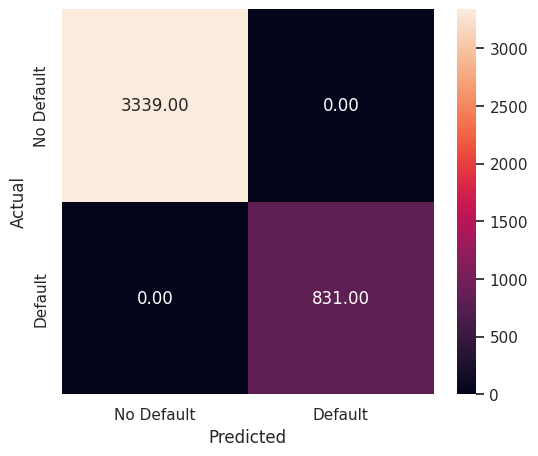

In [ ]:
# Checking performance on the training dataset
y_train_pred = dtree.predict(x_train)

metrics_score(y_train, y_train_pred)

              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92      1431
         1.0       0.70      0.62      0.66       357

    accuracy                           0.87      1788
   macro avg       0.80      0.78      0.79      1788
weighted avg       0.87      0.87      0.87      1788



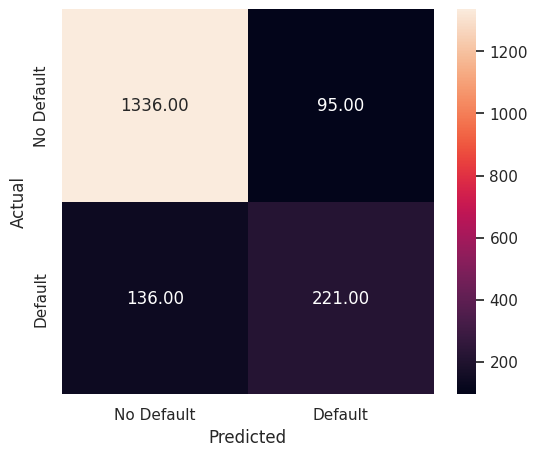

In [ ]:
# Checking performance on the test dataset
y_test_pred = dtree.predict(x_test)

metrics_score(y_test, y_test_pred)

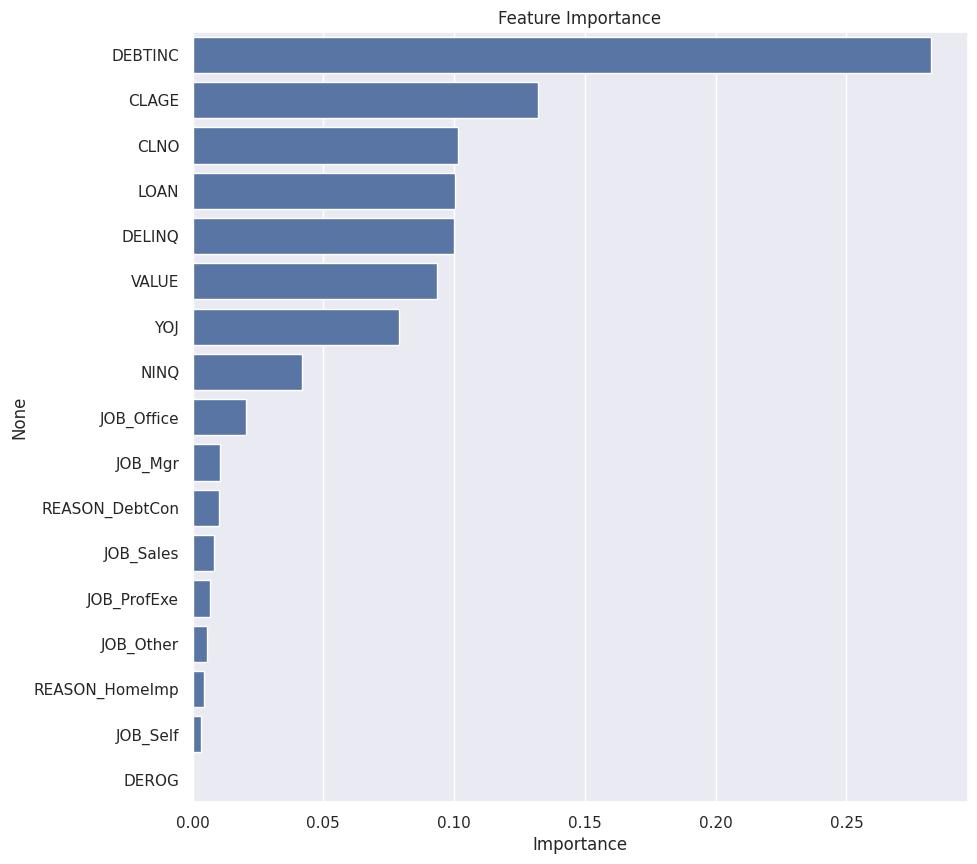

In [ ]:
# Plot the feature importance

importances = dtree.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (10, 10))
plt.title('Feature Importance')


sns.barplot(x=importance_df.Importance,y=importance_df.index);

**Observations:**

The Decision Tree appears to work well on the training data but **not so well on the test data**. The Recall for training dataset is 100% and recall for test data is 62% which is a significant gap which indicates that the the **Decision Tree is overfitting the training data.**

This also means the model correctly identifies 62% of the actual defaults and failes to identify 38% of loans that will default, in the test data.

The recall on the test dataset suggests that there's a 38% (1 - 0.62) chance that the model will predict that a loan is not defulting even though it would default, and **the company suffers a massive loss.**

The precision on test data is 70% whereas the recall is 62%. The objective is to improve recall.

We will have to tune the decision tree to reduce the overfitting and improve performance. Feature importance will be analysed before tuning.

According to feature importance analysis, DEBTINC and CLAGE are the two most important features, followed by CLNO, LOAN, DELINQ, VALUE and YOJ.


#### Decision Tree - Hyperparameter Tuning


In [ ]:
# Define the parameter grid for tuning decision tree
param_grid = {
    'max_depth': np.arange(2, 7),
    'min_samples_split': np.arange(0, 5),
    'min_samples_leaf': np.arange(5, 10),
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Create a base model
dt2 = DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8} , random_state = 1)


# Instantiate the grid search model
grid_searchCV = GridSearchCV(estimator=dt2, param_grid=param_grid,
                           scoring='recall', cv=5, n_jobs=-1, verbose=2)

# Fitting the grid search on the training data
grid_searchCV = grid_searchCV.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
dt2best = grid_searchCV.best_estimator_

# Fit the best estimator to the trainig data
dt2best.fit(x_train, y_train)

Fitting 5 folds for each of 750 candidates, totalling 3750 fits


DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       max_depth=3, max_features='sqrt', min_samples_leaf=5,
                       random_state=1)

In [ ]:
# Print the best parameters and the corresponding recall
print(f"Best parameters: {grid_searchCV.best_params_}")
print(f"Best recall score: {grid_searchCV.best_score_}")

Best parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2}
Best recall score: 0.8940985498881755


              precision    recall  f1-score   support

         0.0       0.95      0.50      0.65      3339
         1.0       0.31      0.90      0.46       831

    accuracy                           0.58      4170
   macro avg       0.63      0.70      0.56      4170
weighted avg       0.82      0.58      0.62      4170



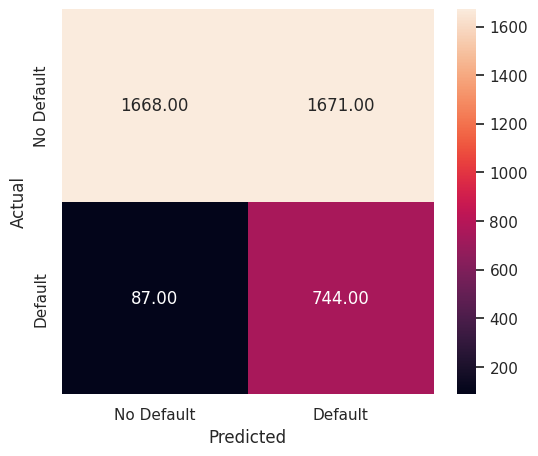

In [ ]:
# Checking performance on the training dataset
y_pred_train = dt2best.predict(x_train)

metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

         0.0       0.96      0.53      0.68      1431
         1.0       0.33      0.92      0.48       357

    accuracy                           0.61      1788
   macro avg       0.65      0.72      0.58      1788
weighted avg       0.84      0.61      0.64      1788



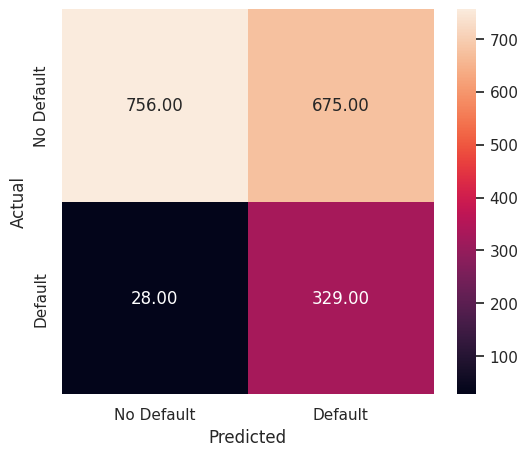

In [ ]:
# Evaluate the best model on the test set

y_pred_test = dt2best.predict(x_test)
metrics_score(y_test, y_pred_test)

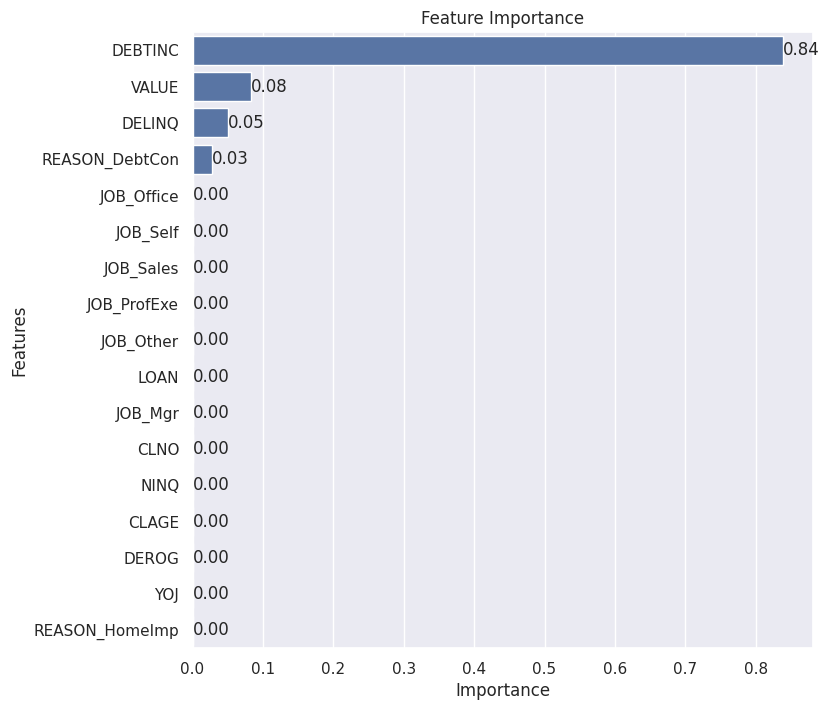

In [ ]:
# Ploting the feature importance

importances = dt2best.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (8, 8))

axis =sns.barplot(x= importance_df.Importance, y= importance_df.index);

# Adding labels
for i in axis.containers:
    axis.bar_label(i, fmt='%.2f')

plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

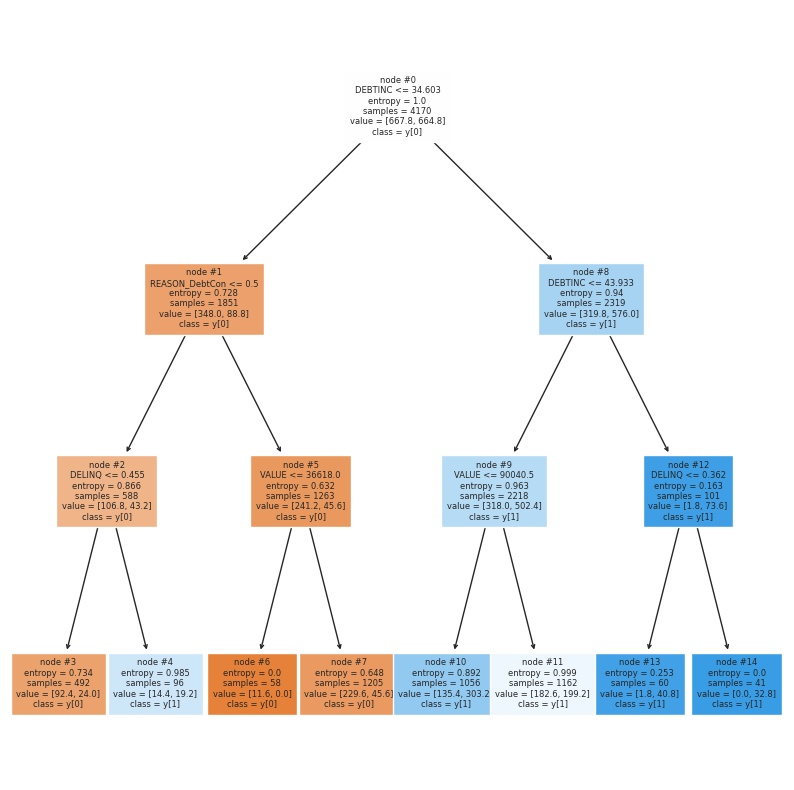

In [ ]:
# visualizing the decision tree
plt.figure(figsize = (10, 10))

tree.plot_tree(dt2best, feature_names = X.columns , filled = True, fontsize = 6, node_ids = True, class_names = True)

plt.show()

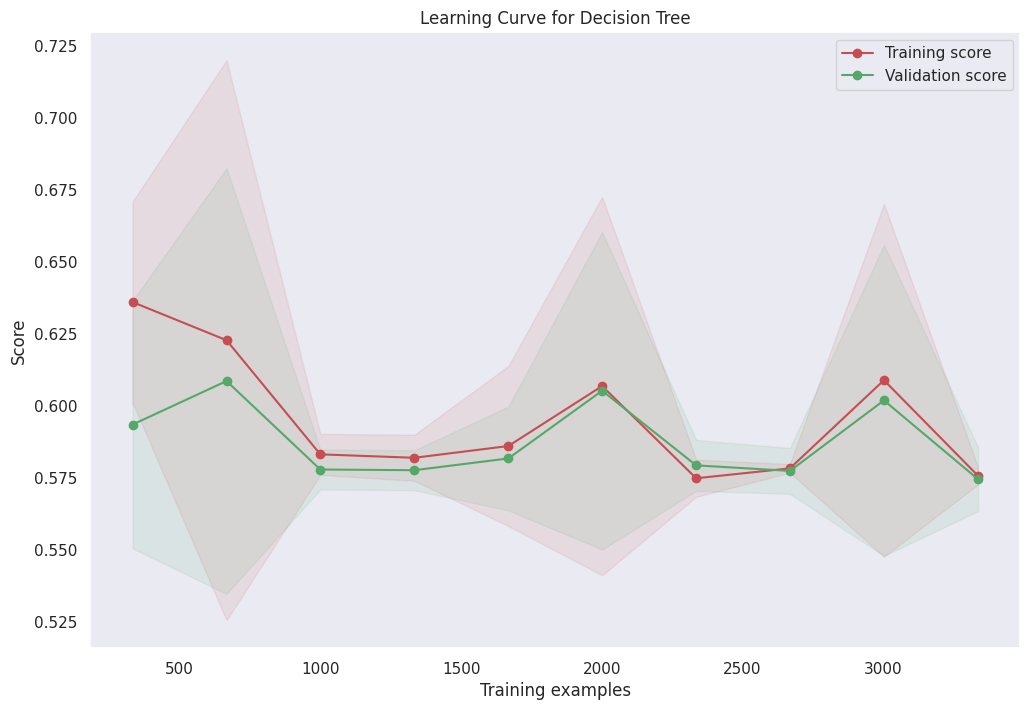

In [ ]:
# Plot learning curves for the Decision Tree
def plot_learning_curve(estimator, X, y, title="Learning Curves", ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 10)):
    """
    Generate a learning curve plot.
    """
    plt.figure(figsize=(12, 8))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, valid_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes
    )
    train_scores_mean = train_scores.mean(axis=1)
    train_scores_std = train_scores.std(axis=1)
    valid_scores_mean = valid_scores.mean(axis=1)
    valid_scores_std = valid_scores.std(axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, valid_scores_mean, 'o-', color="g", label="Validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves for the best decision tree model
plot_learning_curve(dt2best, x_train, y_train, title="Learning Curve for Decision Tree", cv=5)
plt.show()

**Observations:**

After tuning, the decision tree gives a 90% Recall on training data and 92% accuracy on test data. This is a significant improvement on recall.

The tuned decision tree has a highly improved recall for class 1 (defaulters) at the expense of precision and overall accuracy. This is acceptable on this situation because identifying defaulters is crucial, even if it means some non-defaulters are incorrectly classified. However a random forest model will also be tried out.

Improving the recall for defaulters is important for the bank in order to minimize the risk of approving loans to individuals who are likely to default. However, the high recall comes with the cost of precision, meaning more non-defaulters will be incorrectly flagged, potentially leading to lost business opportunities.

According to feature importance on tuned model, DEBTINC, VALU, DELINQ and REASON_DebtCon are only important features, where DEBTINC has the significantly highest impact.

In [ ]:
#K folds Cross Validation

# Define the tuned Decision Tree model with the best parameters
dt2bestk = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3,
    max_features='sqrt',
    min_samples_leaf=5,
    min_samples_split=2,
    class_weight={0: 0.2, 1: 0.8},
    random_state=1
)

# Set up K-Folds Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Evaluate the model using cross_val_score for recall
recall_scores = cross_val_score(dt2bestk, x_train, y_train, cv=kf, scoring='recall')

# Calculate the mean and standard deviation for recall
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)

print("Decision Tree Cross-Validation Results:")
print(f"Recall: {mean_recall:.3f} ± {std_recall:.3f}")

# Determine overfitting or underfitting
print("\nTraining/Test Recall Analysis:")
train_recall = np.mean(cross_val_score(dt2bestk, x_train, y_train, cv=kf, scoring='recall'))
test_recall = np.mean(cross_val_score(dt2bestk, x_test, y_test, cv=kf, scoring='recall'))

print(f"Training Recall: {train_recall:.3f}")
print(f"Testing Recall: {test_recall:.3f}")



Decision Tree Cross-Validation Results:
Recall: 0.885 ± 0.014

Training/Test Recall Analysis:
Training Recall: 0.885
Testing Recall: 0.880


**K folds Cross-Validation Results**

**Recall: 0.885 ± 0.014**

This indicates average recall across the k folds, that is on average, the decision tree model correctly identifies 88.5% of the relevant instances, with a small variation of ±1.4%. This consistency suggests that the model is performing reliably across different folds of the dataset.

**Training Recall: 0.885**
**Testing Recall: 0.880**

The training and testing recall values are very close to each other (0.885 vs. 0.880), which indicates **No Significant Overfitting** and **No Significant Underfitting**. And the training and test recalls are inline with Cross Validation Recall suggesting that the model's performance is stable across different subsets of the data.

## **Random Forest Classifier**

Since the data set is imbalanced, to avoid decision tree getting biased towards the dominant class, class weights can be introduced.

**Data proportions:**

Class 0: 0.800 (approx. 80%)

Class 1: 0.199 (approx. 20%)

**Class weights:**

Class 0: 0.2

Class 1: 0.8

In [ ]:
# Fitting the Random Forest classifier on the training data with class weights
rf_1 = RandomForestClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)


In [ ]:
# Fitting Random Forest model to training data

rf_1.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3339
         1.0       1.00      1.00      1.00       831

    accuracy                           1.00      4170
   macro avg       1.00      1.00      1.00      4170
weighted avg       1.00      1.00      1.00      4170



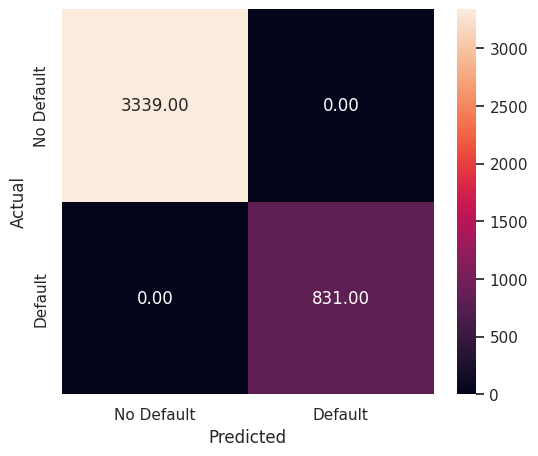

In [ ]:
# Checking performance on the training dataset
y_train_pred_rf = rf_1.predict(x_train)

metrics_score(y_train, y_train_pred_rf)

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      1431
         1.0       0.95      0.66      0.77       357

    accuracy                           0.92      1788
   macro avg       0.93      0.82      0.86      1788
weighted avg       0.93      0.92      0.92      1788



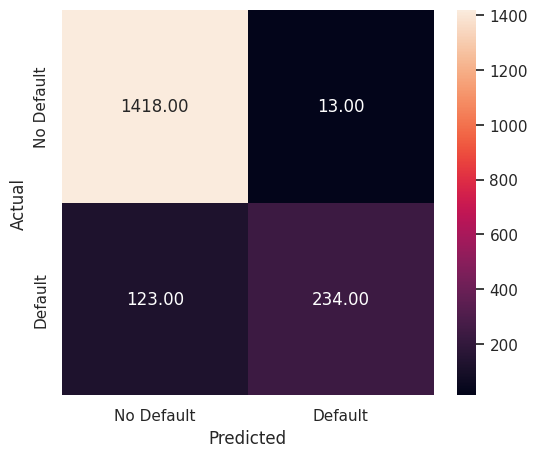

In [ ]:
# Checking performance on the test dataset
y_test_pred_rf = rf_1.predict(x_test)

metrics_score(y_test, y_test_pred_rf)

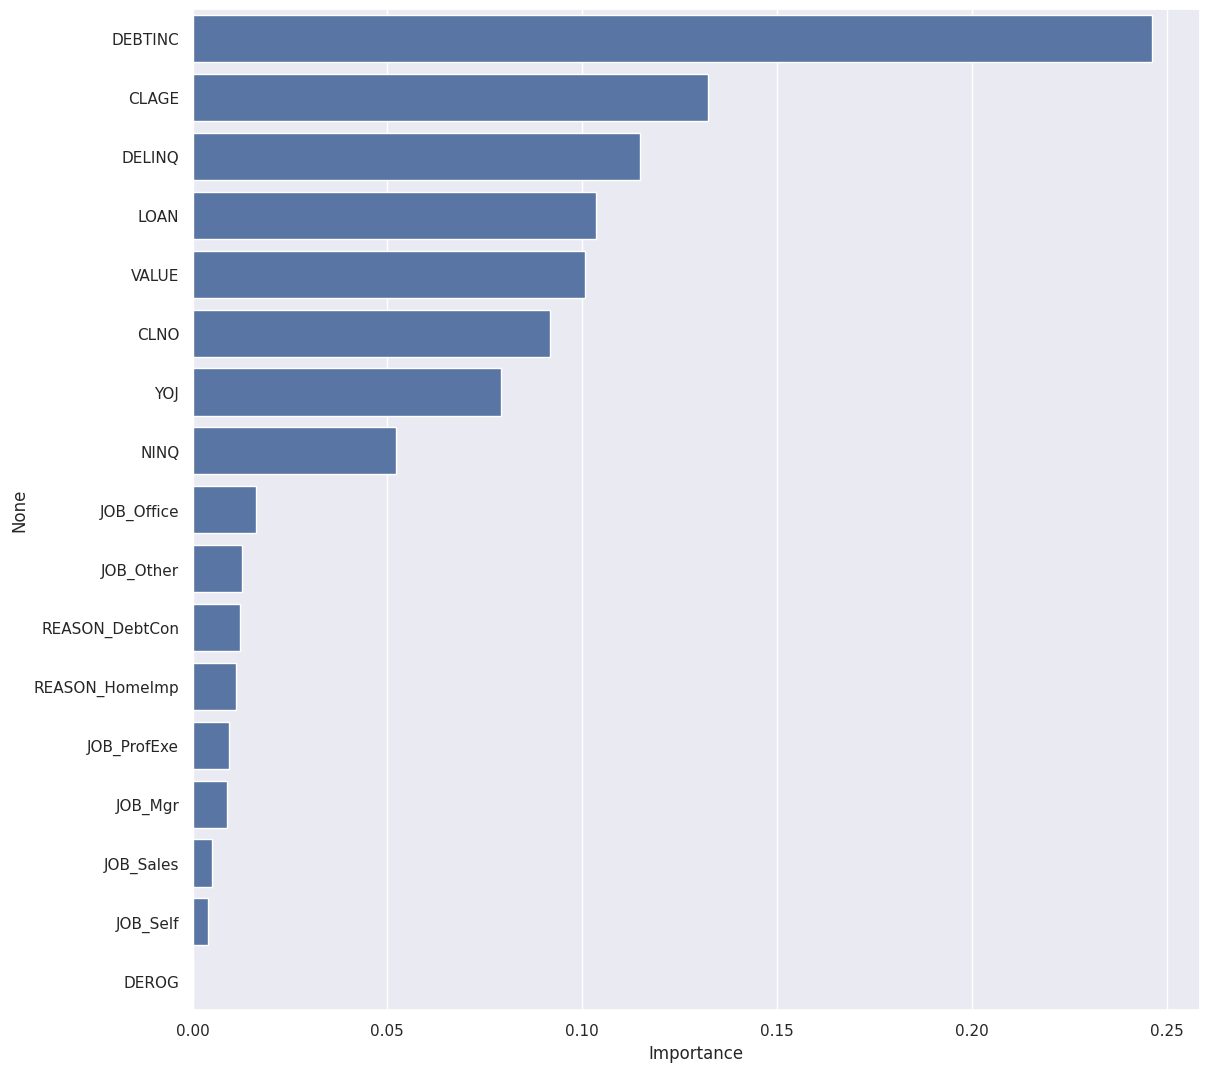

In [ ]:
#Plotting the feature importance

importances = rf_1.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x= importance_df.Importance, y=importance_df.index);

**Observations:**

The Random seems to overfor on training data but not so well on the test data. All metrics including recall for training dataset is 100% and recall for test data is 66% which is a significant gap that indicates that the the **Random Forest is overfitting the training data.**

The precision on test data is 95% whereas the recall is 66%. The objective is to improve recall.

We will have to tune the Random Forest to reduce the overfitting and improve performance. Feature importance will be analysed before tuning.

According to feature importance analysis, DEBTINC, CLAGE and DELINQ are identified as the top three important features. DEROG shows 0 importance.

#### Random Forest Classifier Hyperparameter Tuning

In [ ]:
from sklearn import metrics
from sklearn.metrics import recall_score

# Define the parameter grid for tuning Random Forest
params_rf = {
    "n_estimators": [110, 150],
    'max_depth': [4, 5],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [3, 5],
    'min_samples_leaf': [1, 2, 3],
    'max_features': [ 0.8, 0.9]
}

# Create a base model
rf2 = RandomForestClassifier(class_weight = {0: 0.2, 1: 0.8} , random_state = 1)

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)


# Perform grid search
grid_obj_rf = GridSearchCV(estimator=rf2, param_grid=params_rf,
                           scoring=scorer, cv=5, n_jobs=-1, verbose=2)

# Fitting the grid search on the training data
grid_obj_rf = grid_obj_rf.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
rf_best = grid_obj_rf.best_estimator_

# Fit the best estimator to the trainig data
rf_best.fit(x_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=4,
                       max_features=0.8, min_samples_split=5, n_estimators=150,
                       random_state=1)

In [ ]:
# Print the best parameters and the corresponding recall
print(f"Best parameters: {grid_obj_rf.best_params_}")
print(f"Best recall score: {grid_obj_rf.best_score_}")

Best parameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 0.8, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Best recall score: 0.7809248971935647


              precision    recall  f1-score   support

         0.0       0.94      0.77      0.85      3339
         1.0       0.47      0.81      0.60       831

    accuracy                           0.78      4170
   macro avg       0.71      0.79      0.72      4170
weighted avg       0.85      0.78      0.80      4170



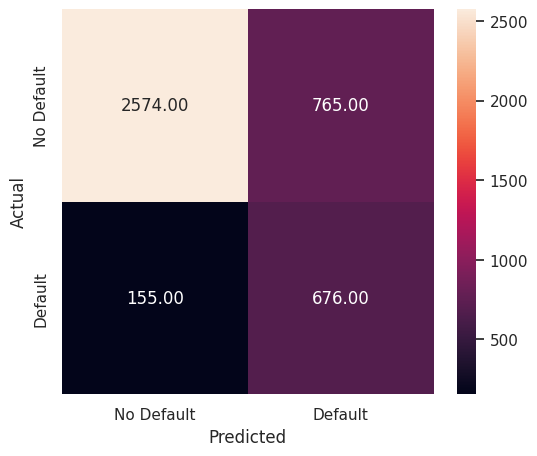

In [ ]:
# Checking performance on the training dataset
y_pred_train_rf = rf_best.predict(x_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

         0.0       0.94      0.79      0.86      1431
         1.0       0.49      0.80      0.61       357

    accuracy                           0.80      1788
   macro avg       0.72      0.80      0.74      1788
weighted avg       0.85      0.80      0.81      1788



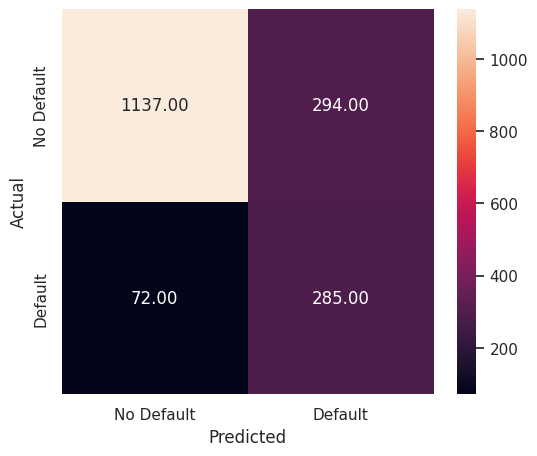

In [ ]:
# Evaluate the best model on the test set

y_pred_test_rf = rf_best.predict(x_test)
metrics_score(y_test, y_pred_test_rf)

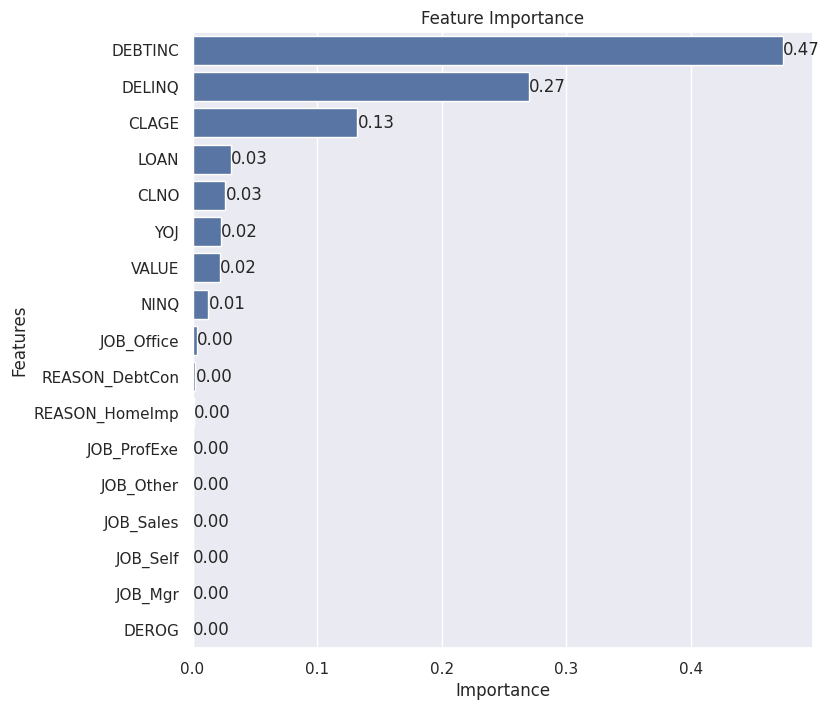

In [ ]:
# Plotting the feature importance

importances = rf_best.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (8, 8))

axis =sns.barplot(x= importance_df.Importance, y= importance_df.index);

# Adding labels
for i in axis.containers:
    axis.bar_label(i, fmt='%.2f')

plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [ ]:
# Create a SHAP explainer
explainer = shap.TreeExplainer(rf_best)

# Compute SHAP values for the first class (class 0)
shap_values = explainer.shap_values(x_train)

# Compute SHAP values for the first class (class 0)
shap_values_class_0 = explainer.shap_values(x_train)[:,:,0]

# Compute SHAP values for the second class (class 1)
shap_values_class_1 = explainer.shap_values(x_train)[:,:,1]

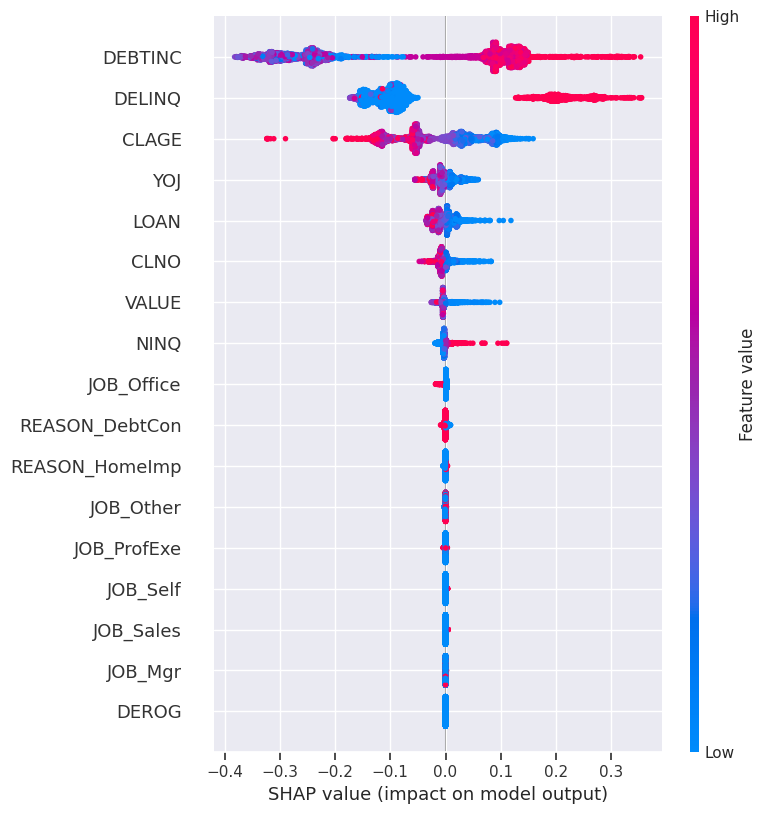

In [ ]:
# Summary plot for class 1
shap.summary_plot(shap_values_class_1, x_train)

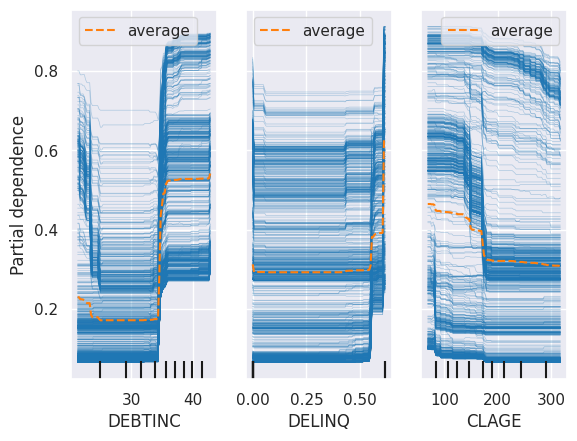

In [ ]:
# Analysing top 3 most important featires of Random Forest model using PDP
features = ['DEBTINC', 'DELINQ', 'CLAGE']

# Plot Partial Dependence for the specified features
PartialDependenceDisplay.from_estimator(
    rf_best,          # The tuned random forest model
    X=x_train,        # The training data
    features=features, # List of features to plot
    kind='both',      # Plot both individual and average effects
    grid_resolution=100,  # The number of points on the grid for each feature
    n_jobs=-1         # Use all processors to speed up computation
)

# Show the plots
plt.show()

**Observations:**

The Random Forest after tuning shows 81% recall on training data and 80% recall on test data. The model has significantly improved and there is no overfit to training data anymore.

The precision on test data and training data has dropped significanltly at the expense of attempting to improve recall.

According to feature importance analysis of tuned Random Forest, DEBTINC, DELINQ and CLAGE are still identified as the top three important features.

Since Random Forest is not as interpretable as decision tree, SHAP is used to make the random forest model more transparent by explaining how individual features contribute to predictions.

**Understanding Random Forest using SHAP Summary plot**

"DEBTINC" (Debt-to-Income Ratio) shows more red dots on the right side, it implies that higher debt-to-income ratios are associated with a higher probability of default.

Similarly higher DELINQ values also contribute to higher possibility of default.

Higher CLAGE values are negatively associated with the possibility of loan default, meaning higher the CLAGE is, lower is the possibility of the loan to default.

DEBTINC, DELINQ and CLAGE are the top 3 most prominant features recognized by SHAP

From the rest of the features, only NINQ Values show a significant positive association to Loan Default. Remaining features YOJ, LOAN, CLNO and VALUE have a negative association to loan default.

**Understanding Top 3 features of Random Forest using PDP**

The steep rise in DEBTINC at around 40 and DELINQ at around 0.5 shows that the model has learned that borrowers with a debt-to-income or DELINQ above given thresholds are significantly more likely to default on their loans.

The PDP plot for CLAGE shows a sudden drop at around 200. This means the model might have learned that borrowers with very old credit lines are typically more reliable and have a lower likelihood of defaulting.

In [ ]:
#k-folds cross validation

# Define the model with best parameters
rf_bestk = RandomForestClassifier(
    class_weight={0: 0.2, 1: 0.8},
    max_depth=4,
    max_features=0.8,
    min_samples_split=5,
    n_estimators=150,
    random_state=1
)

# Perform k-fold cross-validation
cv_scores = cross_val_score(rf_bestk, x_train, y_train, cv=5, scoring='recall')

# Compute mean and standard deviation of cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print(f"Mean Recall from Cross-Validation: {mean_cv_score:.3f}")
print(f"Standard Deviation of Recall: {std_cv_score:.3f}")

# Fit the model to the entire training data
rf_bestk.fit(x_train, y_train)

# Compute training scores
train_scores = cross_val_score(rf_bestk, x_train, y_train, cv=5, scoring='recall', n_jobs=-1)

print(f"Mean Training Recall: {np.mean(train_scores):.3f}")
print(f"Standard Deviation of Training Recall: {np.std(train_scores):.3f}")

Mean Recall from Cross-Validation: 0.781
Standard Deviation of Recall: 0.037
Mean Training Recall: 0.781
Standard Deviation of Training Recall: 0.037


**Observations:**

**Consistent Scores:** Both the mean training recall and the mean cross-validation recall are equal (0.781) and the standard deviations are also equal (0.037). This suggests that the Random Forest model is performing consistently across both training and testing data.

**No Significant Gap:** There is no significant gap seen in between the mean training recall and the mean cross-validation recall suggesting that the model generalizes well and is not likely overfitting.

**Low Standard Deviation:** The low standard deviation in both training and cross-validation recalls suggests that the model's performance is stable and reliable across different subsets of the data.

The Random Forest model appears to be well-tuned and is not overfitting. The performance on the training data is consistent with the performance on the testing data, and the low standard deviation indicates stable performance.
There’s no evidence of significant overfitting in the model.

#### Plotting a few selected trees from tuned Random Forest Classifier

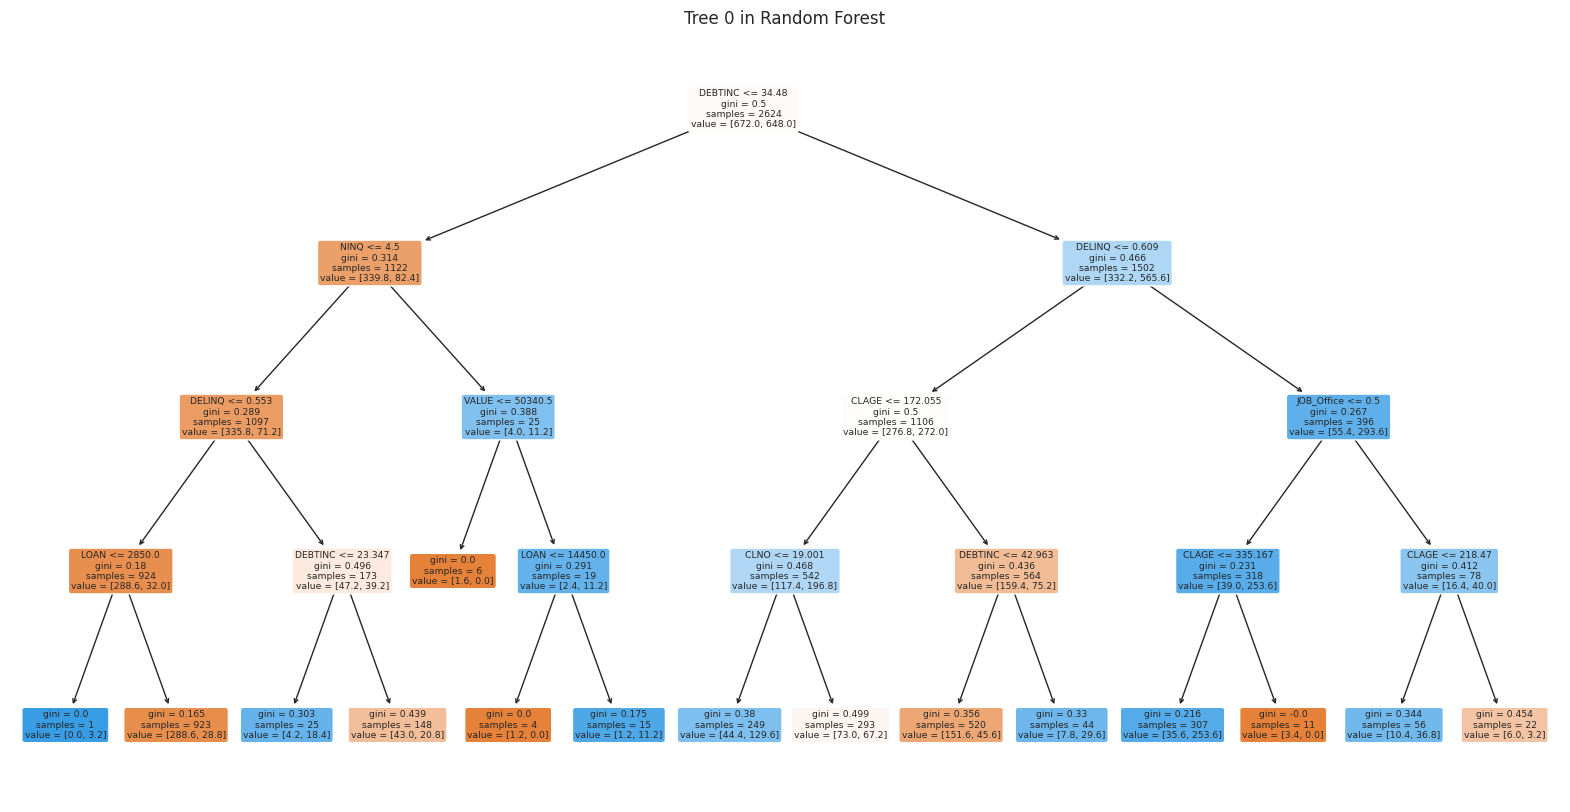

In [ ]:
# Visualizing a single tree from the Random Forest
# Selecting a single tree from the Random Forest
tree_index = 0  # Index of the tree to visualize
plt.figure(figsize=(20, 10))
plot_tree(rf_best.estimators_[tree_index], feature_names=x_train.columns, filled=True, rounded=True)
plt.title(f'Tree {tree_index} in Random Forest')
plt.show()

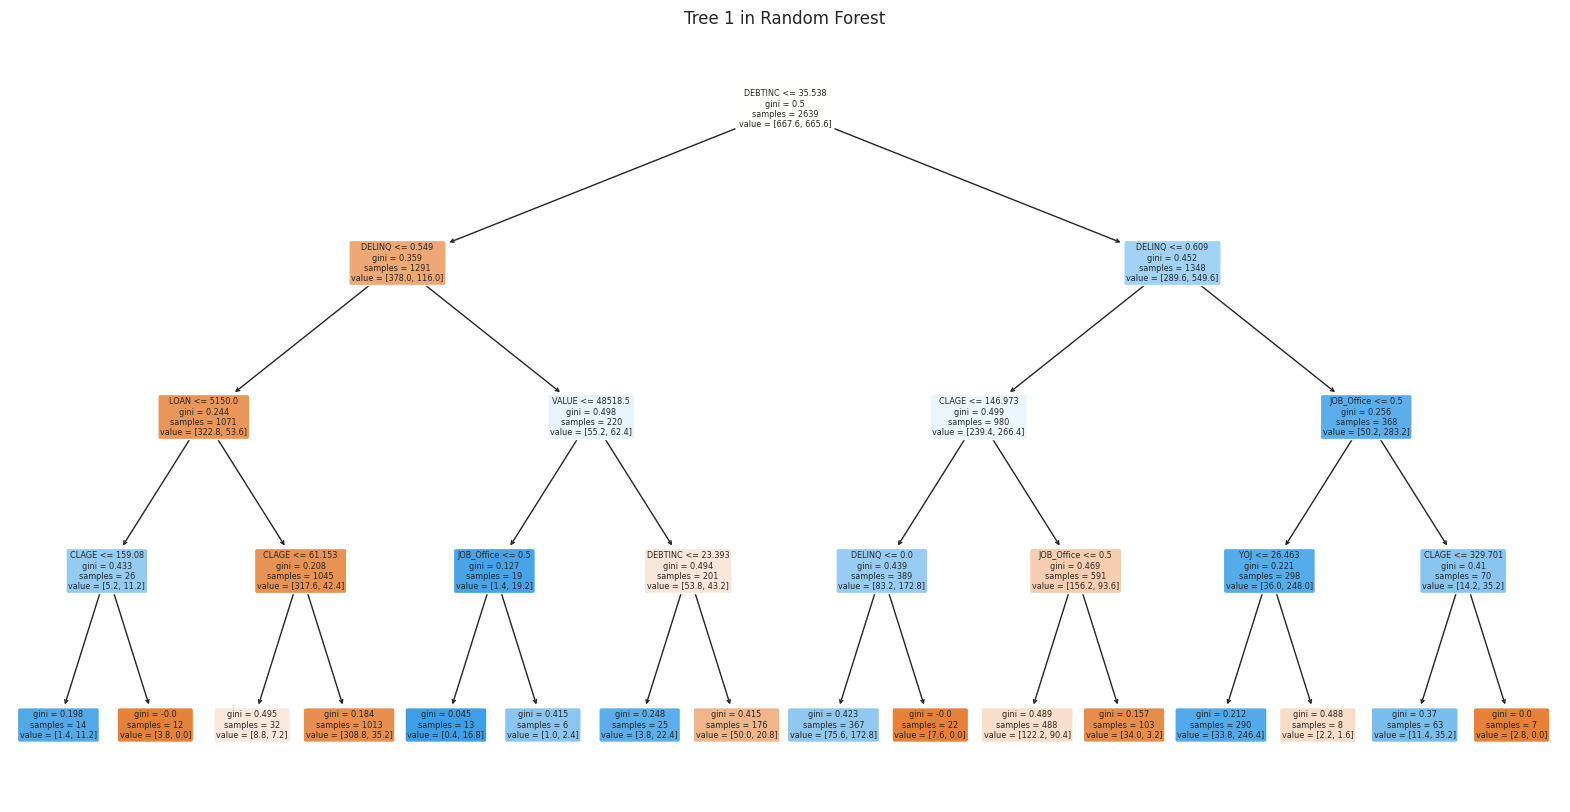

In [ ]:
# Visualizing a single tree from the Random Forest
# Selecting a single tree from the Random Forest
tree_index = 1  # Index of the tree to visualize
plt.figure(figsize=(20, 10))
plot_tree(rf_best.estimators_[tree_index], feature_names=x_train.columns, filled=True, rounded=True)
plt.title(f'Tree {tree_index} in Random Forest')
plt.show()

##**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):**
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

In [ ]:
# Function to evaluate model performance
def evaluate_model(model, x_train, y_train, x_test, y_test, threshold=None):
    if threshold:
        y_train_prob = model.predict_proba(x_train)[:, 1]
        y_test_prob = model.predict_proba(x_test)[:, 1]
        y_train_pred = (y_train_prob >= threshold).astype(int)
        y_test_pred = (y_test_prob >= threshold).astype(int)
    else:
        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)

    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    return {
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'train_recall': train_recall,
        'test_recall': test_recall,
        'train_f1': train_f1,
        'test_f1': test_f1
    }

# Evaluate Logistic Regression
logistic_regression_results = evaluate_model(model, x_train, y_train, x_test, y_test, threshold=0.2436910622255725)

# Evaluate Decision Tree
decision_tree_results = evaluate_model(dt2best, x_train, y_train, x_test, y_test)

# Evaluate Random Forest
random_forest_results = evaluate_model(rf_best, x_train, y_train, x_test, y_test)

# Create a summary DataFrame


summary_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Train Accuracy': [logistic_regression_results['train_accuracy'], decision_tree_results['train_accuracy'], random_forest_results['train_accuracy']],
    'Test Accuracy': [logistic_regression_results['test_accuracy'], decision_tree_results['test_accuracy'], random_forest_results['test_accuracy']],
    'Train Recall': [logistic_regression_results['train_recall'], decision_tree_results['train_recall'], random_forest_results['train_recall']],
    'Test Recall': [logistic_regression_results['test_recall'], decision_tree_results['test_recall'], random_forest_results['test_recall']],
    'Train F1': [logistic_regression_results['train_f1'], decision_tree_results['train_f1'], random_forest_results['train_f1']],
    'Test F1': [logistic_regression_results['test_f1'], decision_tree_results['test_f1'], random_forest_results['test_f1']]
})

print("\nSummary DataFrame:")
summary_df


Summary DataFrame:


Model  Train Accuracy  Test Accuracy  Train Recall  \
0  Logistic Regression        0.678897       0.695190      0.607702   
1        Decision Tree        0.578417       0.606823      0.895307   
2        Random Forest        0.779376       0.795302      0.813478   

   Test Recall  Train F1   Test F1  
0     0.619048   0.42997  0.447822  
1     0.921569   0.45841  0.483468  
2     0.798319   0.59507  0.608974

####**Comparing Models**

**Logistic Regression:**

Moderate performance through out all metrics.
Lower recall and F1-score compared to Decision Tree and Random Forest.
Balanced but not the best in any single metric.

**Decision Tree:**

High recall on both train and test sets, indicating it captures most of the defaulters.
However, the accuracy and F1-score are lower, suggesting it might have a higher false positive rate.


**Random Forest:**

Best performance across accuracy and F1-score.
Recall is high, indicating it captures a good portion of defaulters.
Better generalization compared to Decision Tree due to higher test accuracy and more balanced metrics.


####**Identifying best model**

Random Forest is performing relatively better in terms of overall accuracy, recall, and F1-score. It strikes a good balance between capturing defaulters (recall) and maintaining a reasonable level of precision (F1-score).

##**2. Refined insights:**

- What are the most meaningful insights relevant to the problem?

A **20% overall loan default rate** was observed in the current customer data. Therefore it is timely and vital that the current loan approval process is improved in accuracy and transparency.  

**Debt to Income Ration (BEBTINC) is a very powerful metric that can be used in loan approval process**. It was observed in EDA also that **all clients with a DEBTINC above 45 have defaulted their loans.** After analysing the 3 tuned models, it can be confirmed that all three models identify **DEBTINC as the most influenctial feature that impacts the loan defaulting**. If a borrower has a high DEBTINC, it isuggests that a significant portion of their income is already allocated to debt payments. This leaves less room in their budget for additional loan payments allowing a high likeliness for that borrower to default on a new loan taken. Therefore DEBTINC can be used  to decide on loan approvals.

**DELINQ (the Number of delinquent credit lines) is also a highly impactul feature that should be considered in loan approval process **. This feature is identified by both Decision tree and random forest as **high impact feature on loan default**. DELINQ indicates past difficulties in meeting credit obligations. A higher number of delinquent accounts suggests that the borrower has struggled to make payments on time, which is a strong sign of financial struggle on the borrower's end and therefore can lead to loan defaults.

**CLAGE has a negative influence of loan defaulting.** Higher the CLAGE is, lower the likelihood for the loan to default. This was seen in EDA as well as recognized by the tuned Random Forest. The PDP plot for tuned Random Forest for CLAGE shows a sudden drop at around 200. This means the model might have learned that borrowers with very old credit lines are typically more reliable and have a lower likelihood of defaulting.

It was observed in EDA that all clients with **DEROG above 6** have defaulted their loans. All clients with **DELINQ above 5** have defaulted their loans. All clients with **NINQ above 11** have defaulted their loans. However, in all bove three cases, the count is low. Even though the count is low, **it would be worth to investigate how those loans got approved at the first place with such high DEROGs, DELINQs and NINQs.**

It was observed in EDA that a majority of the clients have taken loans for the reason of Debt Consolidation. However it was observed in EDA as well as it was confirmed from all 3 tuned models as well that the **Reason does not have a significant impact on a loan being defaulted**.

It was observed in EDA that those who are in Sales have the highest loan default rate followed by those who are self employed. Office workers had the lowest loan default rate among all other jobs taken by the client base. This patternwas confirmed by improved Logostic Regression model (as it had positive coefficients for Job_Sales and Job_Self whereas negative coefficient for Job_Office). However none of the models concluded a client's job to be a feature significant enough to impact a client's loan to get defaulted.

##**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?

### **Model Selection Criteria**

#### **Key Metrics that are considered:**

**Class 1 Recall**(Loan Default): Class 1 recall is a crucial metric in this context as we aim to identify as many loan defaults as possible.

**Accuracy**: Accuracy reflects the overall model performance. It is an important metric yet less critical than recall in this context.

**Cross-Validation Stability**: This is an indication of the consistency in recall scores across different folds.

#### **Interpretability:**

**Decision Trees**: Decision Trees are typically highly interpretable. But they have a tendancy to overfit.

**Random Forests**: Compared to decision trees, Random Forests are less interpretable. However Random forests are more robust and generally better in performance. Since Random Forest is not as interpretable as decision tree, SHAP can be used to make the random forest model more transparent by explaining how individual features contribute to predictions. PDP Plots can be used to understand Random Forest by plotting them for it's important features.



###**Model Proposal and Final Solution Design**

Best Model: **Random Forest (with best parameters identified)**

#### **Reasoning:**

**Balanced Performance:** The Random Forest achieves high recall (0.80) while maintaing good accuracy (0.80) on the test set and a good f1 score (0.61). This is not seen in decision tree. Although decision tree gives the highest recall, that is at the expense of f1 score as well as overall model accuracy.

**Robustness and Stability:**
It was taken into consideration that Random Forests are more robust to outliers and Random Forests tend to be more stable because the ensemble method smooths out the effects of outliers. Therefore Random Forests is the recomended model for deployment. This is because the dataset that was used for this project already had considerable amount of outliers in many of the features and therefore a future possibility of outliers in new data can't be ignored.

**Generalization:** Cross-validation results (Mean Recall: 0.781, Std: 0.037) indicate stable performance across different data splits.

**Overfitting Check:** Training and test recall are closely matched (Training Recall: 0.81, Test Recall: 0.80), indicating minimal overfitting.

**Interpretability:** By utilizing SHAP (SHapley Additive exPlanations) and PDP (Partial Dependence Plots) it can be interpreted how the Random Forest model makes decisions and understand the relationships between features and predictions.

#### **Tools and Techniques**

**For Model Training and Evaluation:** RandomForestClassifier with best parameters. (Best parameters: 'criterion': 'gini', 'max_depth': 4, 'max_features': 0.8, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150)

Evaluation using recall, precision, F1-score, and cross-validation.

**Feature Importance Analysis and Model Interpretation:** SHAP (SHAP values to interpret the importance of each feature) and PDP (Plot Partial Dependence Plots (PDP) for key features like DEBTINC, CLAGE and DELINQ).



In [ ]:
%%shell
jupyter nbconvert --to html /content/drive/MyDrive/MIT/Capstone/LD/Final/final.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/MIT/Capstone/LD/Final/final.ipynb to html
[NbConvertApp] Writing 5052335 bytes to /content/drive/MyDrive/MIT/Capstone/LD/Final/final.html
